In [2]:
# perfusion_analysis.ipynb
# Avery Krieger 05/25/2023

# Analyzes and creates figures for AstA perfusion experiments

from visanalysis.analysis import imaging_data, shared_analysis

from matplotlib.colorbar import ColorbarBase
from matplotlib import pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
from scipy import stats as st
import pingouin as pg
import matplotlib as mpl
import os
from pathlib import Path
import numpy as np
import pandas as pd
from visanalysis.util import plot_tools

# import seaborn as sns
# import pandas as pd

/Users/averykrieger/envs/stim_analysis/lib/python3.9/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [3]:
# Type 1

## Fly 1 - Proximal only
t1_fly1_pre_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "1", "mi1_proximal_multiple"]]
t1_fly1_perf_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "2", "mi1_proximal_multiple"]]
t1_fly1_post_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "3", "mi1_proximal_multiple"]]
## Fly 2 - Proximal only
t1_fly2_pre_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "4", "mi1_proximal_multiple"]]
t1_fly2_perf_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "5", "mi1_proximal_multiple"]]
t1_fly2_post_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "6", "mi1_proximal_multiple"]]
## Fly 3 - Proximal, Medial, Distal
### Proximal
t1_fly3_pre_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "10", "mi1_proximal_multiple"]]
t1_fly3_perf_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "11", "mi1_proximal_multiple"]]
t1_fly3_post_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "12", "mi1_proximal_multiple"]]
### Medial
t1_fly3_pre_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "10", "mi1_medial_multiple"]]
t1_fly3_perf_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "11", "mi1_medial_multiple"]]
t1_fly3_post_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "12", "mi1_medial_multiple"]]
### Distal
t1_fly3_pre_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "10", "mi1_distal_multiple"]]
t1_fly3_perf_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "11", "mi1_distal_multiple"]]
t1_fly3_post_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230327", "2023-03-27", "12", "mi1_distal_multiple"]]

# Lists of fly IDs
t1_fly_list_prox = [1, 2, 3]
t1_fly_list_dist = [3]

# Concatenating by block
t1_pre_prox = np.concatenate((t1_fly1_pre_prox, t1_fly2_pre_prox, t1_fly3_pre_prox), axis=0)
t1_perf_prox = np.concatenate((t1_fly1_perf_prox, t1_fly2_perf_prox, t1_fly3_perf_prox), axis=0)
t1_post_prox = np.concatenate((t1_fly1_post_prox, t1_fly2_post_prox, t1_fly3_post_prox), axis=0)

#------------------------------------------------------------

# Type 2
## Fly 1 - Proximal and distal
### Proximal
t2_fly1_pre_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230519.selected", "2023-05-19", "10", "mi1_proximal_multiple"]]
t2_fly1_perf_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230519.selected", "2023-05-19", "13", "mi1_proximal_multiple"]]
t2_fly1_post_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230519.selected", "2023-05-19", "14", "mi1_proximal_multiple"]]
### Distal
t2_fly1_pre_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230519.selected", "2023-05-19", "10", "mi1_distal_multiple"]]
t2_fly1_perf_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230519.selected", "2023-05-19", "13", "mi1_distal_multiple"]]
t2_fly1_post_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230519.selected", "2023-05-19", "14", "mi1_distal_multiple"]]
## Fly 2 - Proximal and distal
### Proximal
t2_fly2_pre_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230519.selected", "2023-05-19", "15", "mi1_proximal_multiple"]]
t2_fly2_perf_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230519.selected", "2023-05-19", "16", "mi1_proximal_multiple"]]
t2_fly2_post_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230519.selected", "2023-05-19", "18", "mi1_proximal_multiple"]]
### Distal
# t2_fly2_pre_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230519.selected", "2023-05-19", "15", "mi1_distal_multiple"]]
# t2_fly2_perf_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230519.selected", "2023-05-19", "16", "mi1_distal_multiple"]]
# t2_fly2_post_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230519.selected", "2023-05-19", "18", "mi1_distal_multiple"]]
## Fly 3 - Proximal and distal
### Proximal - center, surround, both (all)
t2_fly3_pre_prox_all = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "7", "mi1_proximal_all"]]
t2_fly3_pre_prox_center = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "7", "mi1_proximal_center"]]
t2_fly3_pre_prox_surround = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "7", "mi1_proximal_surround"]]
t2_fly3_perf_prox_all = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "8", "mi1_proximal_all"]]
t2_fly3_perf_prox_center = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "8", "mi1_proximal_center"]]
t2_fly3_perf_prox_surround = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "8", "mi1_proximal_surround"]]
t2_fly3_post_prox_all = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "10", "mi1_proximal_all"]]
t2_fly3_post_prox_center = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "10", "mi1_proximal_center"]]
t2_fly3_post_prox_surround = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "10", "mi1_proximal_surround"]]
### Distal - all only
t2_fly3_pre_dist_all = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "7", "mi1_distal_all"]]
t2_fly3_perf_dist_all = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "8", "mi1_distal_all"]]
t2_fly3_post_dist_all = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "10", "mi1_distal_all"]]
## Fly 4 - Proximal and distal
### Proximal - center, surround, both (all)
t2_fly4_pre_prox_all = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "12", "mi1_proximal_all"]]
t2_fly4_pre_prox_center = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "12", "mi1_proximal_center"]]
t2_fly4_pre_prox_surround = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "12", "mi1_proximal_surround"]]
t2_fly4_perf_prox_all = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "13", "mi1_proximal_all"]]
t2_fly4_perf_prox_center = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "13", "mi1_proximal_center"]]
t2_fly4_perf_prox_surround = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "13", "mi1_proximal_surround"]]
t2_fly4_post_prox_all = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "14", "mi1_proximal_all"]]
t2_fly4_post_prox_center = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "14", "mi1_proximal_center"]]
t2_fly4_post_prox_surround = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "14", "mi1_proximal_surround"]]
### Distal - all only
t2_fly4_pre_dist_all = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "12", "mi1_distal_all"]]
t2_fly4_perf_dist_all = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "13", "mi1_distal_all"]]
t2_fly4_post_dist_all = [["/Volumes/ABK2TBData/data_repo/bruker/20230522", "2023-05-22", "14", "mi1_distal_all"]]
## Fly 5 - Proximal only
t2_fly5_pre_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230531.moco", "2023-05-31", "17", "mi1_proximal_all"]]
t2_fly5_perf_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230531.moco", "2023-05-31", "19", "mi1_proximal_all"]] # had to re-run perfusion so.. fucked?
t2_fly5_post_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230531.moco", "2023-05-31", "20", "mi1_proximal_all"]]
## Fly 6 - Proximal only
t2_fly6_pre_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230531.moco", "2023-05-31", "21", "mi1_proximal_all"]]
t2_fly6_perf_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230531.moco", "2023-05-31", "22", "mi1_proximal_all"]]
t2_fly6_post_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230531.moco", "2023-05-31", "24", "mi1_proximal_all"]]

# Lists of fly IDs
t2_fly_list_prox = [1, 2, 3, 4, 5, 6]
t2_fly_list_dist = [1, 3, 4]

# Concatenate by block
t2_pre_prox_all = np.concatenate((t2_fly1_pre_prox, t2_fly2_pre_prox, t2_fly3_pre_prox_center, t2_fly4_pre_prox_center, t2_fly5_pre_prox, t2_fly6_pre_prox), axis=0)
t2_perf_prox_all = np.concatenate((t2_fly1_perf_prox, t2_fly2_perf_prox, t2_fly3_perf_prox_center, t2_fly4_perf_prox_center, t2_fly5_perf_prox, t2_fly6_perf_prox), axis=0)
t2_post_prox_all = np.concatenate((t2_fly1_post_prox, t2_fly2_post_prox, t2_fly3_post_prox_center, t2_fly4_post_prox_center, t2_fly5_post_prox, t2_fly6_post_prox), axis=0)

t2_pre_prox_center = np.concatenate((t2_fly3_pre_prox_center, t2_fly4_pre_prox_center), axis=0)
t2_perf_prox_center = np.concatenate((t2_fly3_perf_prox_center, t2_fly4_perf_prox_center), axis=0)
t2_post_prox_center = np.concatenate((t2_fly3_post_prox_center, t2_fly4_post_prox_center), axis=0)

t2_pre_prox_surround = np.concatenate((t2_fly3_pre_prox_surround, t2_fly4_pre_prox_surround), axis=0)
t2_perf_prox_surround = np.concatenate((t2_fly3_perf_prox_surround, t2_fly4_perf_prox_surround), axis=0)
t2_post_prox_surround = np.concatenate((t2_fly3_post_prox_surround, t2_fly4_post_prox_surround), axis=0)

t2_pre_dist_all = np.concatenate((t2_fly1_pre_dist, t2_fly3_pre_dist_all, t2_fly4_pre_dist_all), axis=0)
t2_perf_dist_all = np.concatenate((t2_fly1_perf_dist, t2_fly3_perf_dist_all, t2_fly4_perf_dist_all), axis=0)
t2_post_dist_all = np.concatenate((t2_fly1_post_dist, t2_fly3_post_dist_all, t2_fly4_post_dist_all), axis=0)

## concatenate all blocks
t2_prox_all = [t2_pre_prox_all, t2_perf_prox_all, t2_post_prox_all]
t2_dist_all = [t2_pre_dist_all, t2_perf_dist_all, t2_post_dist_all]
t2_prox_list = [1, 2, 3, 4, 5, 6]

# pretty, for fig panel B
t2_pre_prox_pretty = np.concatenate((t2_fly1_pre_prox, t2_fly3_pre_prox_center, t2_fly6_pre_prox), axis=0)
t2_perf_prox_pretty = np.concatenate((t2_fly1_perf_prox, t2_fly3_perf_prox_center, t2_fly6_perf_prox), axis=0)
t2_post_prox_pretty = np.concatenate((t2_fly1_post_prox, t2_fly3_post_prox_center, t2_fly6_post_prox), axis=0)
t2_prox_pretty = [t2_pre_prox_pretty, t2_perf_prox_pretty, t2_post_prox_pretty]
t2_prox_pretty_list = [1, 3, 6]

# Center v surround
t2_prox_center = [t2_pre_prox_center, t2_perf_prox_center, t2_post_prox_center]
t2_prox_surround = [t2_pre_prox_surround, t2_perf_prox_surround, t2_post_prox_surround]
t2_center_surround_list = [3, 4]

#-------------------------------------------

# Concatenate all together - T1 and T2
all_pre_prox = np.concatenate((t1_pre_prox, t2_pre_prox_all), axis=0)
all_perf_prox = np.concatenate((t1_perf_prox, t2_perf_prox_all), axis=0)
all_post_prox = np.concatenate((t1_post_prox, t2_post_prox_all), axis=0)

all_pre_dist = np.concatenate((t1_fly3_pre_dist, t2_pre_dist_all), axis=0)
all_perf_dist = np.concatenate((t1_fly3_perf_dist, t2_perf_dist_all), axis=0)
all_post_dist = np.concatenate((t1_fly3_post_dist, t2_post_dist_all), axis=0)

all_prox = [all_pre_prox, all_perf_prox, all_post_prox]
all_dist = [all_pre_dist, all_perf_dist, all_post_dist]

all_fly_list = [1, 2, 3, 4, 5, 6, 7]
all_fly_list_prox = [1, 2, 3, 4, 5, 6, 7]
all_fly_list_dist = [3, 4, 5, 6, 7]

# Other lists for indexing and labeling
exp_layer = ["Proximal", "Medial", "Distal"]
exp_block_type = ["Pre", "Perfusion", "Wash"]

# NOTE: perhaps should make a list that has t1 as the center and then center from t2

save_directory = "/Volumes/ABK2TBData/lab_repo/analysis/outputs/perfusion_analysis/"
Path(save_directory).mkdir(exist_ok=True)

In [4]:
# Vis flash code

def visFlash(ID):
    flash_start = ID.getRunParameters('pre_time')
    flash_width = ID.getRunParameters('stim_time')
    
    flash_end = flash_start + flash_width
    
    return flash_start, flash_end

# finding vis flash
# loading in a random good file to get the flash start and end times
file_path = os.path.join(t2_fly6_pre_prox[0][0], t2_fly6_pre_prox[0][1] + ".hdf5")
ID = imaging_data.ImagingDataObject(file_path, t2_fly6_pre_prox[0][2], quiet=True)

flash_start, flash_end = visFlash(ID)

In [5]:
#  function that pulls out the mean and sem responses
def getMetrics(which_experiment):
    file_path = os.path.join(which_experiment[0], which_experiment[1] + ".hdf5")
    ID = imaging_data.ImagingDataObject(file_path, which_experiment[2], quiet=True)
    roi_data = ID.getRoiResponses(which_experiment[3])

    # epoch_response is ROI x time x trial
    time_vector, epoch_response = ID.getEpochResponseMatrix(np.vstack(roi_data['roi_response']))

    # mean_response is ROI x time (trials have been averaged)
    _, mean_response, sem_response, _ = ID.getTrialAverages(epoch_response)
    # ('current_led_intensity', 'current_led_duration')
    # calc the sem + / -
    sem_plus = mean_response + sem_response
    sem_minus = mean_response - sem_response

    # calculate the mean, max, min for each trial
    # This is ROI x trials
    mean_by_rois = ID.getResponseAmplitude(epoch_response, metric='mean')
    max_by_rois = ID.getResponseAmplitude(epoch_response, metric='max')
    min_by_rois = ID.getResponseAmplitude(epoch_response, metric='min')
    # Average across ROIs, dimensions are (trials,)
    mean_by_trial = np.mean(mean_by_rois, axis=0)
    max_by_trial = np.mean(max_by_rois, axis=0)
    min_by_trial = np.mean(min_by_rois, axis=0)
    # SEM across ROIs - dimensions are (trials,)
    sem_mean_by_trial = np.std(mean_by_rois, axis=0) / np.sqrt(len(mean_by_trial))
    sem_max_by_trial = np.std(max_by_rois, axis=0) / np.sqrt(len(max_by_trial))
    sem_min_by_trial = np.std(min_by_rois, axis=0) / np.sqrt(len(min_by_trial))

    epoch_timestamps = ID.getEpochParameters('epoch_unix_time')   # sec
    epoch_timestamps = epoch_timestamps

    return time_vector, epoch_response, mean_response, sem_response, sem_plus, sem_minus, mean_by_rois, max_by_rois, min_by_rois, mean_by_trial, max_by_trial, min_by_trial, sem_mean_by_trial, sem_max_by_trial, sem_min_by_trial, epoch_timestamps

There are 77 ROIs in total.


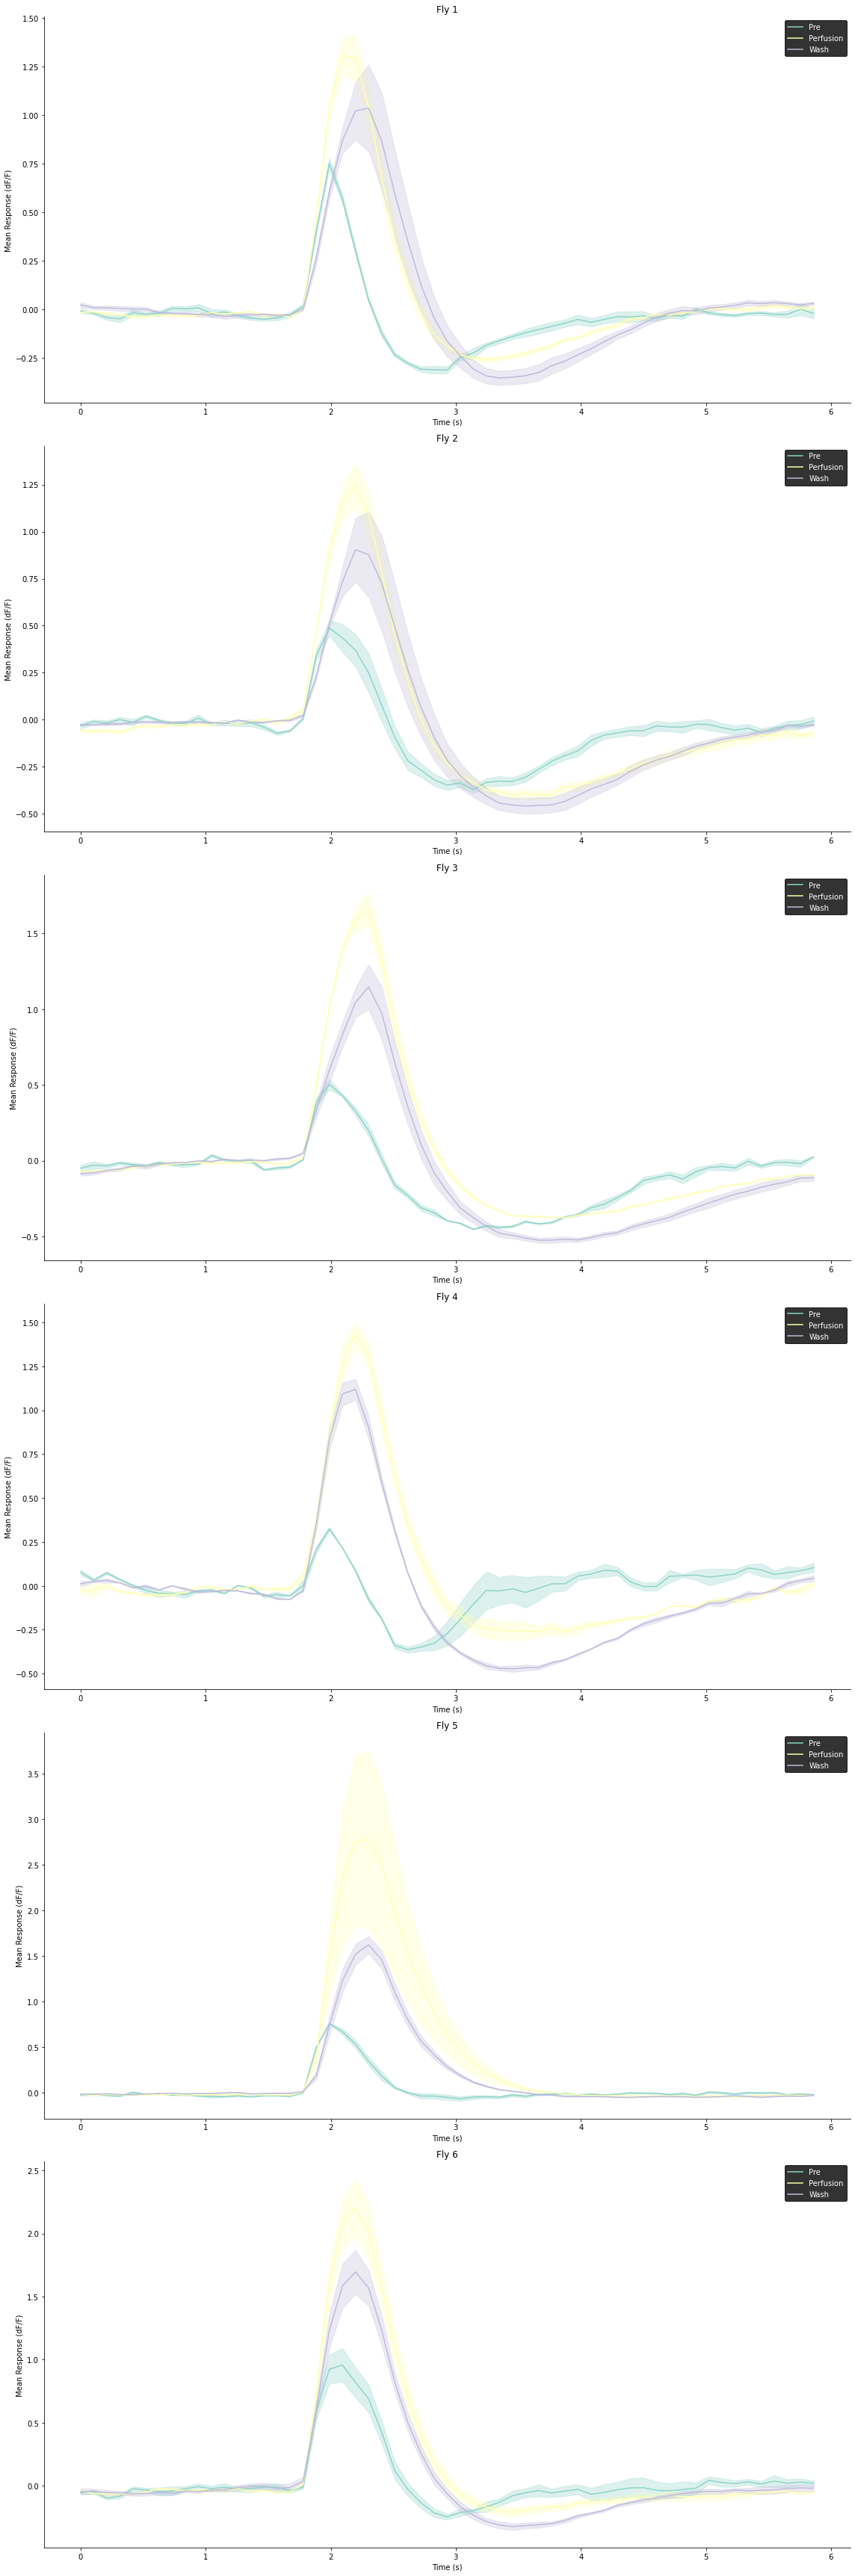

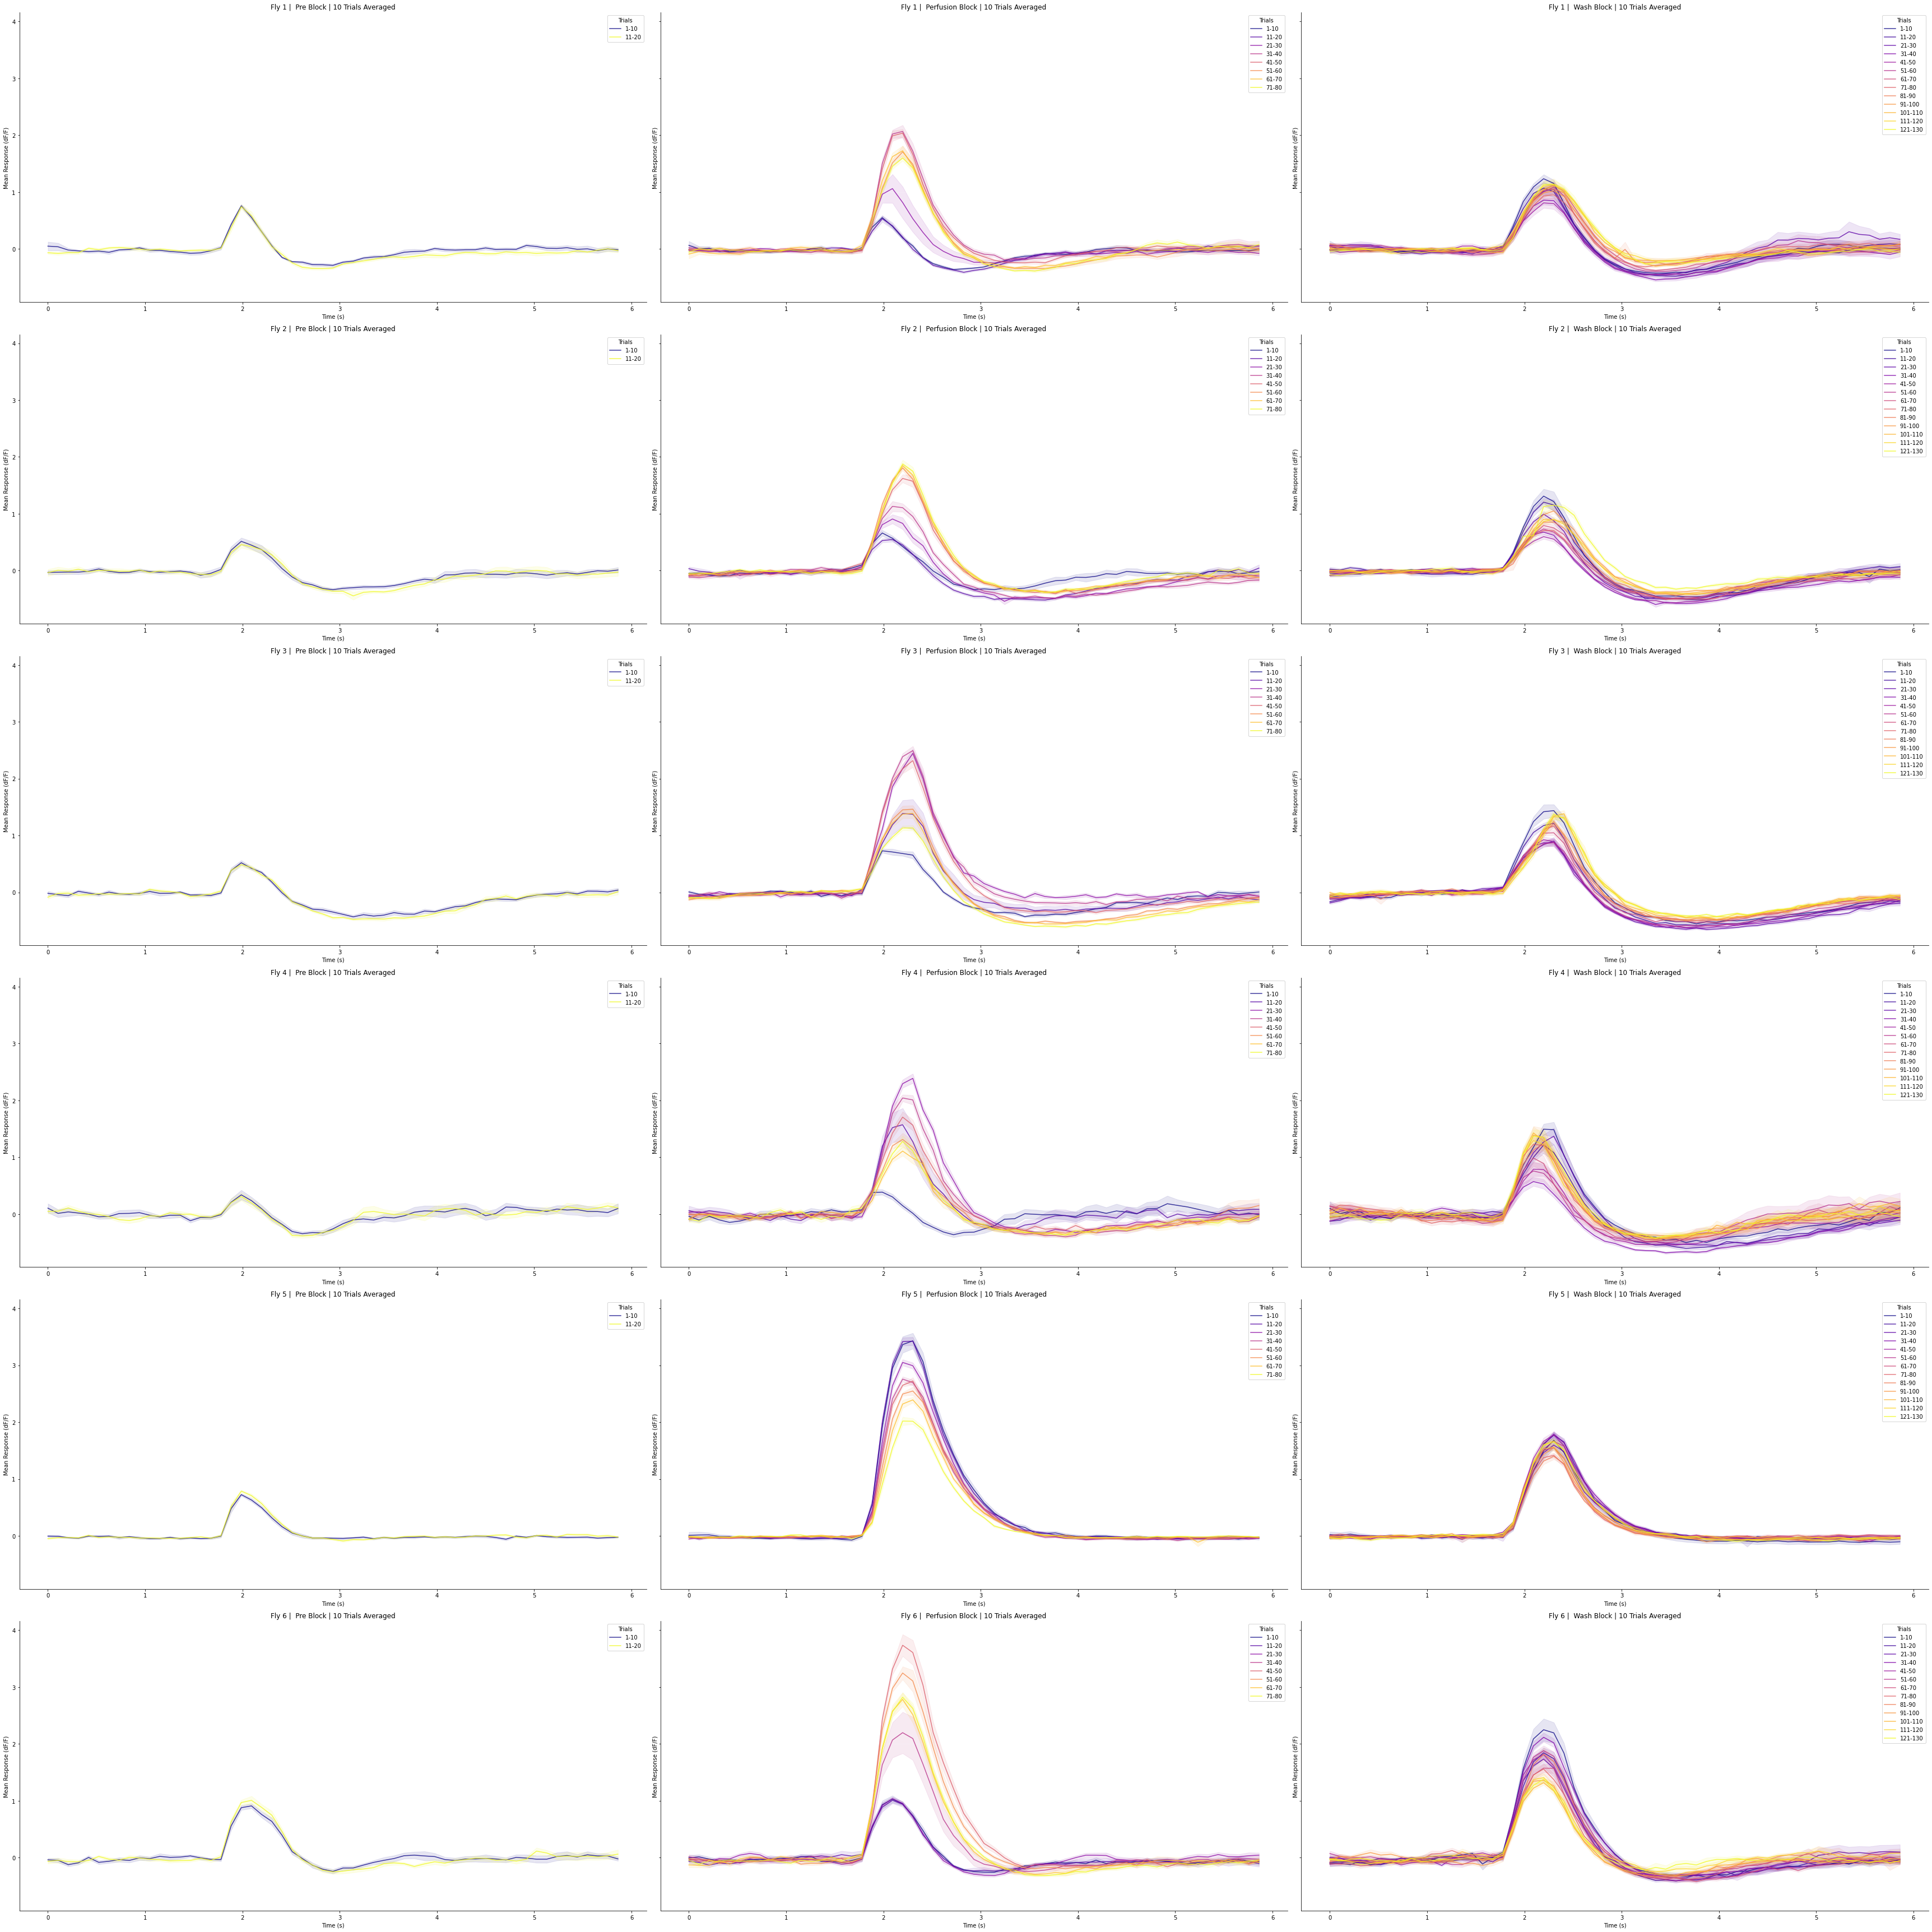

In [6]:
which_layer = t2_prox_all # t2_prox_all all_prox
which_list = t2_prox_list # t2_prox_list all_fly_list_prox
which_str = 't2_prox_all'
every_n = 10
save_fig = False

roi_count = 0

# Plotting the whole trace
exp_count = len(which_layer[0]) # number of experiments# set the color map
cmap = plt.get_cmap('Set3') # also 'cool' 'winter' 'PRGn' 'Pastel1' 'YlGnBu' 'twilight'
colors = [cmap(i) for i in np.linspace(0.0, 1.0, 12)]

# First figure
fh, ax = plt.subplots(exp_count, 1, figsize=(16, 8*exp_count))
# Second figure
fh1, ax1 = plt.subplots(exp_count, len(exp_block_type), figsize=(16*3, 8*exp_count), sharey=True)
for block_ind in range(len(exp_block_type)):
    for exp_ind in range(exp_count):
        time_vector, epoch_response, mean_response, _, _, _, _, _, _, _, _, _, _, _, _, _ = getMetrics(which_layer[block_ind][exp_ind])    
        # Data for Figure 1 - mean across all trials        
        # Mean - dimensions are trials x time
        roi_count += mean_response.shape[0]
        mean_across_rois = np.squeeze(mean_response.mean(axis=0))
        sem = np.squeeze(np.std(mean_response, axis=0) / np.sqrt(mean_response.shape[0]))
        sem_plus_across_rois = mean_across_rois + sem
        sem_minus_across_rois = mean_across_rois - sem
        # Plot it
        ax[exp_ind].plot(time_vector, mean_across_rois, color=colors[block_ind], label=exp_block_type[block_ind])
        ax[exp_ind].fill_between(time_vector, sem_plus_across_rois, sem_minus_across_rois, color=colors[block_ind], alpha=0.3)
        # axes handling
        ax[exp_ind].set_title(f'Fly {which_list[exp_ind]}')
        ax[exp_ind].grid(color='white', alpha=0.2)
        ax[exp_ind].legend(facecolor='black', edgecolor='black', labelcolor='white')
        ax[exp_ind].set_xlabel('Time (s)')
        ax[exp_ind].set_ylabel('Mean Response (dF/F)')
        ax[exp_ind].spines['right'].set_visible(False)
        ax[exp_ind].spines['top'].set_visible(False)
        # Super title
        #fh.suptitle('Mean Response by Fly ROIs', fontsize=20)

        # Data for Figure 2 - mean across every 10 trials
        # loop where every every_n trials are averaged
        # first, average epoch_response across ROIs. it is ROIs x trials x time
        epoch_response_mean = np.mean(epoch_response, axis=0)
        cmap1 = plt.get_cmap('plasma')
        colors1 = [cmap1(i) for i in np.linspace(0, 1, epoch_response_mean.shape[0]//every_n)]
        for i in range(0, epoch_response_mean.shape[0], every_n):
            # Mean - dimensions are trials x time
            mean_every_ten = epoch_response_mean[i:i+every_n, :].mean(axis=0)
            sem_every_ten = np.std(epoch_response_mean[i:i+every_n, :], axis=0) / np.sqrt(epoch_response_mean[i:i+every_n, :].shape[0])
            sem_plus_every_ten = mean_every_ten + sem_every_ten
            sem_minus_every_ten = mean_every_ten - sem_every_ten
            # Plot it
            ax1[exp_ind, block_ind].plot(time_vector, mean_every_ten, color=colors1[i//every_n], alpha=0.8, label=f'{i+1}-{i+every_n}')
            ax1[exp_ind, block_ind].fill_between(time_vector, sem_plus_every_ten, sem_minus_every_ten, color=colors1[i//every_n], alpha=0.1)
            # axes handling
            ax1[exp_ind, block_ind].set_title(f'Fly {which_list[exp_ind]} |  {exp_block_type[block_ind]} Block | {every_n} Trials Averaged')
            ax1[exp_ind, block_ind].grid(color='white', alpha=0.2)
            ax1[exp_ind, block_ind].set_xlabel('Time (s)')
            ax1[exp_ind, block_ind].set_ylabel('Mean Response (dF/F)')
            ax1[exp_ind, block_ind].spines['right'].set_visible(False)
            ax1[exp_ind, block_ind].spines['top'].set_visible(False)
            ax1[exp_ind, block_ind].legend(title='Trials', loc='upper right')
            #fh1.suptitle(f'Mean Response by Fly, every {every_n} Trials Averaged', fontsize=20)

fh.set_tight_layout(True)
fh1.set_tight_layout(True)

print(f'There are {roi_count} ROIs in total.')

if save_fig:
    fh.savefig(f'{save_directory}/mean_response_by_fly.{which_str}.pdf', dpi=300, bbox_inches='tight', transparent=True)
    fh.savefig(f'{save_directory}/mean_response_by_fly.{which_str}.svg', dpi=300, bbox_inches='tight', transparent=True)

    fh1.savefig(f'{save_directory}/mean_response_by_fly_every_{every_n}_trials.{which_str}.pdf', dpi=300, bbox_inches='tight', transparent=True)
    fh1.savefig(f'{save_directory}/mean_response_by_fly_every_{every_n}_trials.{which_str}.svg', dpi=300, bbox_inches='tight', transparent=True)    

## Figure 4a

Just the traces for an example fly

In [51]:
ID.getRunParameters()

{'center': array([0., 0.]),
 'height': 240.0,
 'idle_color': 0.5,
 'intensity': array([1.]),
 'num_epochs': 20.0,
 'pre_time': 2.0,
 'protocol_ID': 'UniformFlash',
 'randomize_order': False,
 'run_start_time': '15:26:28.38',
 'run_start_unix_time': 1685571988.385219,
 'stim_time': 0.5,
 'tail_time': 3.5,
 'width': 240.0}

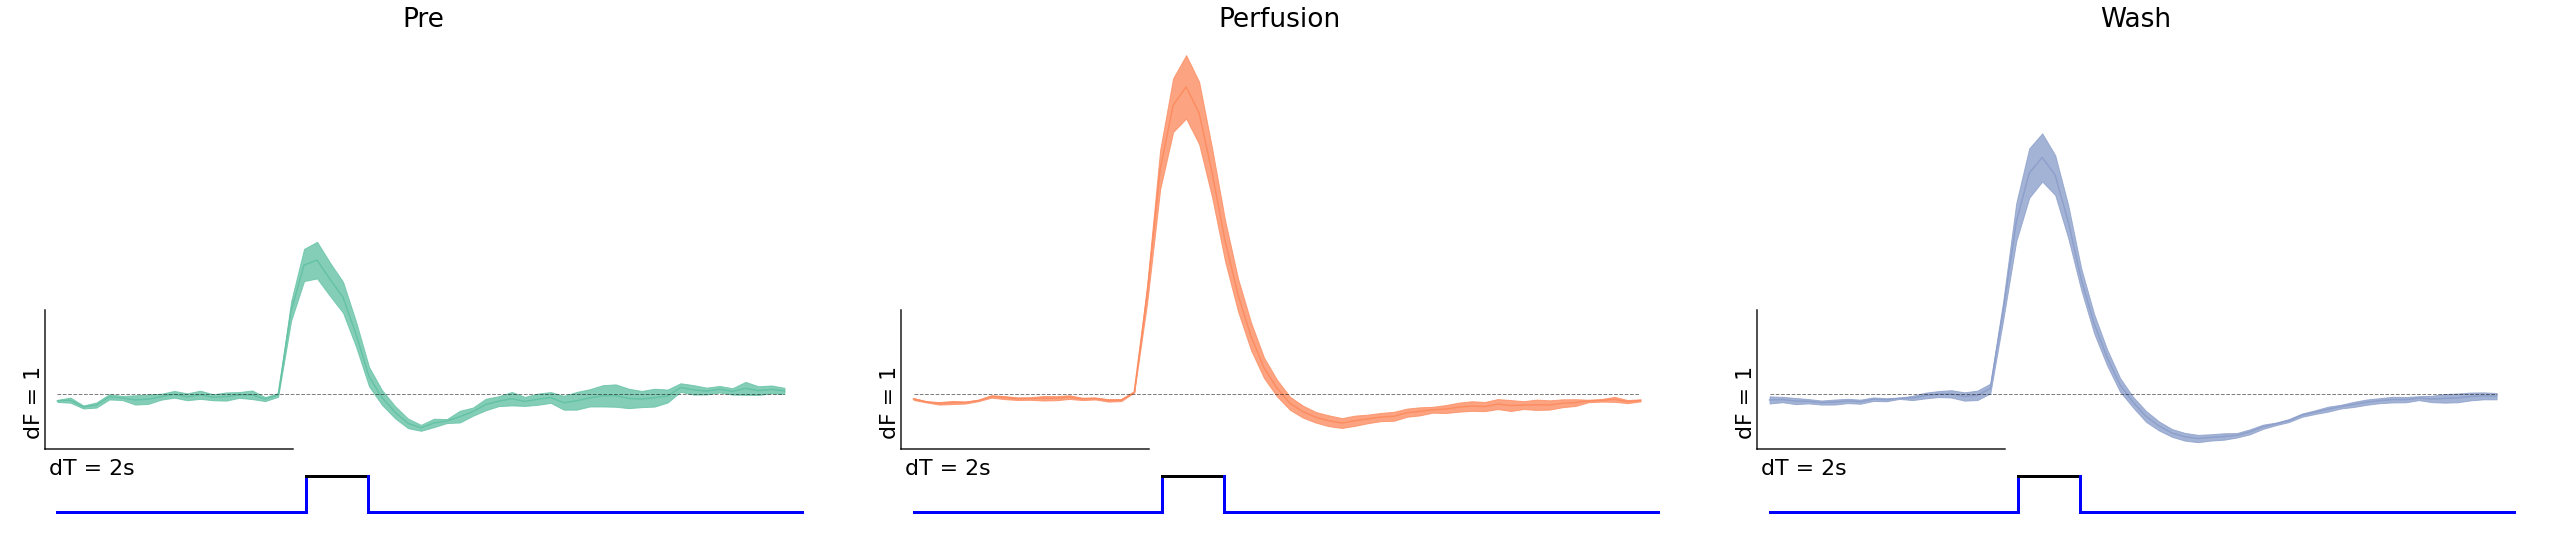

In [225]:
which_layer = t2_prox_all # t2_prox_all all_prox
which_list = t2_prox_list # t2_prox_list all_fly_list_prox
which_str = 't2_prox_all'
every_n = 10
which_fly = 5
save_fig = True

dF = 1
dT = 2
plt.rcParams.update({'font.size': 22})
type_list = ['Pre', 'AstA Perfusion', 'Wash']
# Plotting the whole trace
exp_count = len(which_layer[0]) # number of experiments# set the color map
# colors = [cmap(i) for i in np.linspace(0.0, 1.0, 8)]
# percent_cmap = plt.get_cmap('YlGn') # also 'PuRd' | 'Oranges' | 'Greens'

cmap = plt.get_cmap('Set2') # also 'cool' 'winter' 'PRGn' 'Pastel1' 'YlGnBu' 'twilight'
colors = [cmap(i) for i in np.linspace(0, 1.0, 8)]

# First figure
fh, ax = plt.subplots(1, 3, figsize=(6*exp_count, 8), sharey=True)
# Second figure
for block_ind in range(len(exp_block_type)):
    time_vector, epoch_response, mean_response, _, _, _, _, _, _, _, _, _, _, _, _, _ = getMetrics(which_layer[block_ind][which_fly])    
    # Data for Figure 1 - mean across all trials        
    # Mean - dimensions are trials x time
    mean_across_rois = np.squeeze(mean_response.mean(axis=0))
    sem = np.squeeze(np.std(mean_response, axis=0) / np.sqrt(mean_response.shape[0]))
    sem_plus_across_rois = mean_across_rois + sem
    sem_minus_across_rois = mean_across_rois - sem
    # Plot it
    ax[block_ind].plot(time_vector, mean_across_rois, color=colors[block_ind], label=exp_block_type[block_ind])
    ax[block_ind].fill_between(time_vector, sem_plus_across_rois, sem_minus_across_rois, color=colors[block_ind], alpha=0.8)

    # plot a line at x=0 to time_vector[-1] at y=0
    ax[block_ind].plot([0, time_vector[-1]], [0, 0], color='k', linewidth=1, linestyle='--', alpha=0.5)

    # Plot a step function above each subplot that goes up at flash_start and down at flash_end
    flash_height = 0.26
    flash_base = -0.85
    trial_length = 6
    lin_wid = 3
    ax[block_ind].plot([0, flash_start], [flash_base, flash_base], color='b', linewidth=lin_wid)
    ax[block_ind].plot([flash_start, flash_start], [flash_base, flash_height+flash_base], color='b', linewidth=lin_wid)
    ax[block_ind].plot([flash_start, flash_end], [flash_height+flash_base, flash_height+flash_base], color='k', linewidth=lin_wid)
    ax[block_ind].plot([flash_end, flash_end], [flash_base, flash_height+flash_base], color='b', linewidth=lin_wid)
    ax[block_ind].plot([flash_end, trial_length], [flash_base, flash_base], color='b', linewidth=lin_wid)
    
    # axes handling
    ax[block_ind].set_title(exp_block_type[block_ind])
    ax[block_ind].grid(color='white', alpha=0.2)
    # ax[block_ind].legend()
    ax[block_ind].set_xlabel('Time (s)')
    ax[block_ind].set_ylabel('Mean Response (dF/F)')
    ax[block_ind].spines['right'].set_visible(False)
    ax[block_ind].spines['top'].set_visible(False)
    ax[block_ind].spines['bottom'].set_visible(False)
    ax[block_ind].spines['left'].set_visible(False)

    # Plotting function stuff
    plot_tools.cleanAxes(ax[block_ind])
    plot_tools.addScaleBars(ax[block_ind], dT=dT, dF=dF, T_value=-0.1, F_value=-0.4)
    ax[block_ind].text(0.05, 0.12, f'dT = {dT}s', transform=ax[block_ind].transAxes, fontsize=22)
    ax[block_ind].text(0.02, 0.2, f'dF = {dF}', transform=ax[block_ind].transAxes, fontsize=22, rotation=90)
      
fh.set_tight_layout(True)

if save_fig:
    fh.savefig(f'{save_directory}/a.mean_response_fly{which_fly}.{which_str}.pdf', dpi=300, bbox_inches='tight')
    fh.savefig(f'{save_directory}/a.mean_response_by_fly{which_fly}.svg', dpi=300, bbox_inches='tight')


Need to manually skip trials. Plot them all and find which trial to skip to
t2 prox pretty:
- Fly 1: 24
- Fly 2: 22
- Fly 3: 14
- Fly 4: 13
- Fly 5: 
- Fly 6: 33

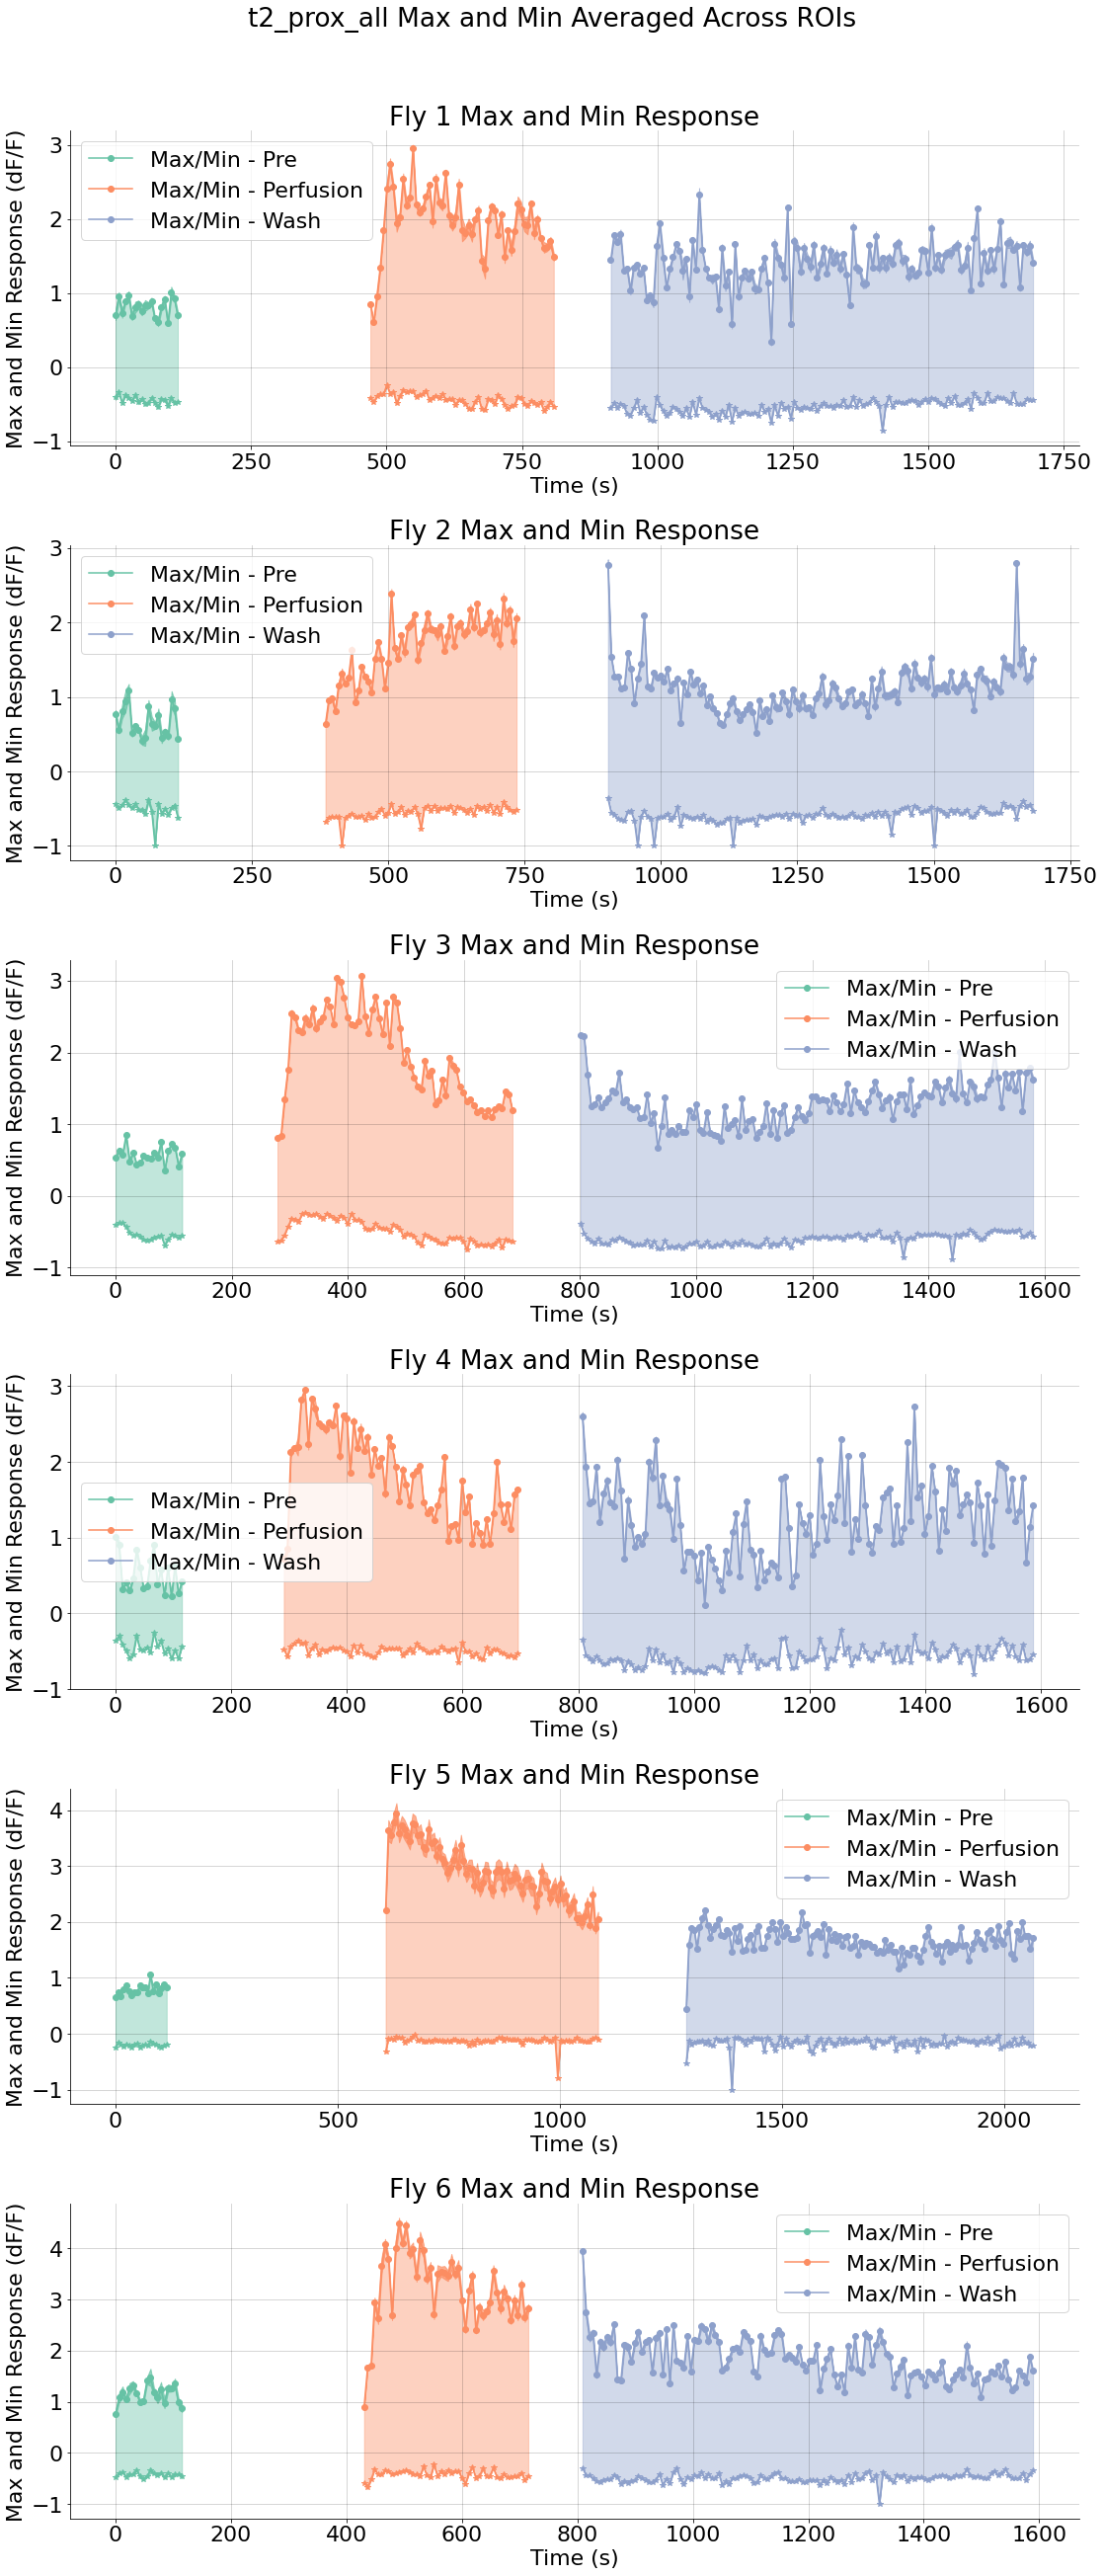

In [29]:
# plot the min and max values separately from the mean values
which_layer = t2_prox_all # t2_prox_all | all_prox | all_dist | t2_prox_center | t2_prox_surround | t2_prox_pretty
which_str = 't2_prox_all' # 't2_prox_all' | 'all_prox' | 'all_dist' | t2_center_surround_list| t2_prox_center | t2_prox_surround
which_list = t2_prox_list # t2_prox_list | all_fly_list_prox | all_fly_list_dist | t2_center_surround_list | t2_prox_pretty_list
skip_trials = 0
n_poly = 4
alpha_fill = False
plot_fits = False
perf_start = [24, 21, 13, 12, 0, 32] # hardcoded start for perfusion trials

save_fig = True

exp_count = len(which_layer[0]) # number of experiments# set the color map
minmax_fig, minmax_ax = plt.subplots(exp_count, 1, figsize=(16, 6*exp_count))
# mean_fig, mean_ax = plt.subplots(exp_count, 1, figsize=(16, 4*exp_count))
# set the color map
cmap = plt.get_cmap('Set2') # also 'cool' 'winter' 'PRGn' 'Pastel1' 'YlGnBu' 'twilight'
colors = [cmap(i) for i in np.linspace(0, 1.0, 8)]
percent_cmap = plt.get_cmap('YlGn') # also 'PuRd' | 'Oranges' | 'Greens'
percent_colors = [percent_cmap(i) for i in np.linspace(0, 1, 101)] # 101 because we want 0-100%

t0 = 0
for exp_ind in range(exp_count):
    for block_ind in range(len(exp_block_type)):
        _, _, _, _, _, _, _, _, _, mean_by_trial, max_by_trial, min_by_trial, sem_mean_by_trial, sem_max_by_trial, sem_min_by_trial, epoch_timestamps = getMetrics(which_layer[block_ind][exp_ind])
        
        # subset the trials HERE for the perfusion hand-selection
        if block_ind == 1:
            max_by_trial = max_by_trial[perf_start[exp_ind]:]
            min_by_trial = min_by_trial[perf_start[exp_ind]:]
            sem_max_by_trial = sem_max_by_trial[perf_start[exp_ind]:]
            sem_min_by_trial = sem_min_by_trial[perf_start[exp_ind]:]
            mean_by_trial = mean_by_trial[perf_start[exp_ind]:]
            sem_mean_by_trial = sem_mean_by_trial[perf_start[exp_ind]:]
            epoch_timestamps = epoch_timestamps[perf_start[exp_ind]:]

        if block_ind == 0:
            t0 = epoch_timestamps[0]

        # subtract the first timepoint from all timepoints to get a relative time to 0
        plot_timestamps = epoch_timestamps - t0
        # plot the max_across_rois
        minmax_ax[exp_ind].plot(plot_timestamps[skip_trials:], max_by_trial[skip_trials:], marker='o', color=colors[block_ind], label=(f'Max/Min - {exp_block_type[block_ind]}'))
        minmax_ax[exp_ind].fill_between(plot_timestamps[skip_trials:], max_by_trial[skip_trials:] + sem_max_by_trial[skip_trials:], max_by_trial[skip_trials:] - sem_max_by_trial[skip_trials:], 
                                        color=colors[block_ind], alpha=0.7)
        # plot the min_across_rois
        minmax_ax[exp_ind].plot(plot_timestamps[skip_trials:], min_by_trial[skip_trials:], marker='*', color=colors[block_ind],) # label=(f'Min - {exp_block_type[block_ind]}'))
        minmax_ax[exp_ind].fill_between(plot_timestamps[skip_trials:], min_by_trial[skip_trials:] + sem_min_by_trial[skip_trials:], min_by_trial[skip_trials:] - sem_min_by_trial[skip_trials:], 
                                        color=colors[block_ind], alpha=0.7)
        if plot_fits:
            # plot linear regression of max_across_rois
            slope, intercept, r_value, p_value, std_err = st.linregress(plot_timestamps[skip_trials:], max_by_trial[skip_trials:])
            minmax_ax[exp_ind].plot(plot_timestamps[skip_trials:], intercept + slope*plot_timestamps[skip_trials:], 
                                    color='k', linestyle='dashed', alpha=0.8, label='Linear Fit' if block_ind == 2 else None)
            # Plot a polynomial fit of max_across_rois with degree n_poly
            z = np.polyfit(plot_timestamps[skip_trials:], max_by_trial[skip_trials:], n_poly)
            p = np.poly1d(z)
            minmax_ax[exp_ind].plot(plot_timestamps[skip_trials:], p(plot_timestamps[skip_trials:]), 
                                    alpha=0.8, color='r', linestyle='dashed', 
                                    label=f'{n_poly} Deg Fit' if block_ind == 2 else None)
            # plot linear regression of min_across_rois
            slope, intercept, r_value, p_value, std_err = st.linregress(plot_timestamps[skip_trials:], min_by_trial[skip_trials:])
            minmax_ax[exp_ind].plot(plot_timestamps[skip_trials:], intercept + slope*plot_timestamps[skip_trials:], color='k', linestyle='dashed', alpha=0.8)
        # fill between the min and max values
        if alpha_fill:
            # calculate the difference between the max and min values
            minmax_diff = max_by_trial[skip_trials:] - min_by_trial[skip_trials:]
            
            for i in range(len(minmax_diff)-1):
                diff_percent = int(st.percentileofscore(minmax_diff, minmax_diff[i+1]))
                minmax_ax[exp_ind].fill_between([plot_timestamps[skip_trials:][i], plot_timestamps[skip_trials:][i+1]], 
                                                [min_by_trial[skip_trials:][i], min_by_trial[skip_trials:][i+1]], 
                                                [max_by_trial[skip_trials:][i], max_by_trial[skip_trials:][i+1]],
                                                color=percent_colors[diff_percent], alpha=0.7)

        else:
            minmax_ax[exp_ind].fill_between(plot_timestamps[skip_trials:], min_by_trial[skip_trials:], max_by_trial[skip_trials:], color=colors[block_ind], alpha=0.4)
        # Axes settings:
        minmax_ax[exp_ind].set_title(f'Fly {which_list[exp_ind]} Max and Min Response')
        minmax_ax[exp_ind].set_ylabel('Max and Min Response (dF/F)')
        minmax_ax[exp_ind].set_xlabel('Time (s)')
        minmax_ax[exp_ind].legend()
        minmax_ax[exp_ind].grid(alpha=0.2, color='black')
        minmax_ax[exp_ind].spines['top'].set_visible(False)
        minmax_ax[exp_ind].spines['right'].set_visible(False)
        minmax_fig.suptitle(f'{which_str} Max and Min Averaged Across ROIs', y=1.01)
        minmax_fig.set_tight_layout(True)

        # # mean fig
        # # plot the mean_across_rois
        # mean_ax[exp_ind].plot(plot_timestamps[skip_trials:], mean_by_trial[skip_trials:], color=colors[block_ind], label=exp_block_type[block_ind])
        # mean_ax[exp_ind].fill_between(plot_timestamps[skip_trials:], mean_by_trial[skip_trials:] + sem_mean_by_trial[skip_trials:], mean_by_trial[skip_trials:] - sem_mean_by_trial[skip_trials:], color=colors[block_ind], alpha=0.4)
        # # plot linear regression of mean_across_rois
        # slope, intercept, r_value, p_value, std_err = st.linregress(plot_timestamps[skip_trials:], mean_by_trial[skip_trials:])
        # mean_ax[exp_ind].plot(plot_timestamps[skip_trials:], intercept + slope*plot_timestamps[skip_trials:], color=colors[block_ind], linestyle='dashed',)
        # # Axes settings:
        # mean_ax[exp_ind].set_ylabel('Mean Response (dF/F)')
        # mean_ax[exp_ind].set_title(f'Fly {which_list[exp_ind]} Mean Response')
        # mean_ax[exp_ind].set_xlabel('Time (s)')
        # # mean_ax[exp_ind].legend()
        # mean_ax[exp_ind].grid(alpha=0.2, color='black')
        # mean_ax[exp_ind].spines['top'].set_visible(False)
        # mean_ax[exp_ind].spines['right'].set_visible(False)
        # #mean_fig.suptitle(f'{which_str} Mean Averaged Across ROIs', y=1.01)
        # mean_fig.set_tight_layout(True)

# add a single colorbar for diff_percent to the entire figure with padding
if alpha_fill:
    cbar_ax = minmax_fig.add_axes([1, 0.15, 0.02, 0.7])
    cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=percent_cmap, orientation='vertical', alpha=0.7)
    cbar.set_label('Percentile of Difference Between Max and Min')
    cbar.set_ticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, .6, .7, .8, .9, 1])


# save the figures
if save_fig:
    minmax_fig.savefig(f'{save_directory}/minmax_by_fly.{which_str}.npoly{n_poly}.alpha_fill-{alpha_fill}.pdf', dpi=300, bbox_inches='tight', transparent=True)
    minmax_fig.savefig(f'{save_directory}/minmax_by_fly.{which_str}.npoly{n_poly}.alpha_fill-{alpha_fill}.svg', dpi=300, bbox_inches='tight', transparent=True)

    # mean_fig.savefig(f'{save_directory}/mean_by_fly.{which_str}.npoly{n_poly}.alpha_fill-{alpha_fill}.pdf', dpi=300, bbox_inches='tight', transparent=True)
    # mean_fig.savefig(f'{save_directory}/mean_by_fly.{which_str}.npoly{n_poly}.alpha_fill-{alpha_fill}.svg', dpi=300, bbox_inches='tight', transparent=True)

## Figure for a single example fly trace over time

In [232]:
t2_prox_all[0][5]

array(['/Volumes/ABK2TBData/data_repo/bruker/20230531.moco', '2023-05-31',
       '21', 'mi1_proximal_all'], dtype='<U54')

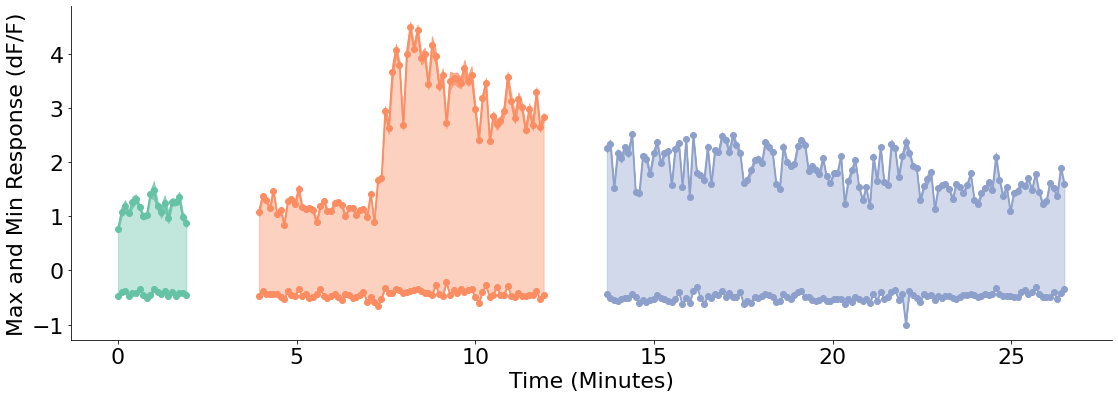

In [246]:
# plot the min and max values separately from the mean values
which_layer = t2_prox_all # t2_prox_all | all_prox | all_dist | t2_prox_center | t2_prox_surround | t2_prox_pretty
which_str = 't2_prox_all' # 't2_prox_all' | 'all_prox' | 'all_dist' | t2_center_surround_list| t2_prox_center | t2_prox_surround
which_list = t2_prox_list # t2_prox_list | all_fly_list_prox | all_fly_list_dist | t2_center_surround_list | t2_prox_pretty_list
skip_trials = 0
which_fly = 5
perf_start = [24, 21, 13, 12, 0, 32] # hardcoded start for perfusion trials

save_fig = True

exp_count = 1 #len(which_layer[0]) # number of experiments# set the color map
minmax_fig, minmax_ax = plt.subplots(exp_count, 1, figsize=(16, 6*exp_count))
# mean_fig, mean_ax = plt.subplots(exp_count, 1, figsize=(16, 4*exp_count))
# set the color map
cmap = plt.get_cmap('Set2') # also 'cool' 'winter' 'PRGn' 'Pastel1' 'YlGnBu' 'twilight'
colors = [cmap(i) for i in np.linspace(0, 1.0, 8)]
percent_cmap = plt.get_cmap('YlGn') # also 'PuRd' | 'Oranges' | 'Greens'
percent_colors = [percent_cmap(i) for i in np.linspace(0, 1, 101)] # 101 because we want 0-100%

t0 = 0

for block_ind in range(len(exp_block_type)):
    _, _, _, _, _, _, _, _, _, mean_by_trial, max_by_trial, min_by_trial, sem_mean_by_trial, sem_max_by_trial, sem_min_by_trial, epoch_timestamps = getMetrics(which_layer[block_ind][which_fly])

    if block_ind == 0:
        t0 = epoch_timestamps[0]
    if block_ind == 2:
        skip_trials = 2
    else:
        skip_trials = 0

    # subtract the first timepoint from all timepoints to get a relative time to 0
    plot_timestamps = epoch_timestamps - t0
    plot_timestamps = plot_timestamps / 60 # convert to minutes
    # plot the max_across_rois
    minmax_ax.plot(plot_timestamps[skip_trials:], max_by_trial[skip_trials:], marker='o', color=colors[block_ind], label=(f'Max/Min - {exp_block_type[block_ind]}'))
    minmax_ax.fill_between(plot_timestamps[skip_trials:], max_by_trial[skip_trials:] + sem_max_by_trial[skip_trials:], max_by_trial[skip_trials:] - sem_max_by_trial[skip_trials:], 
                                    color=colors[block_ind], alpha=0.7)
    # plot the min_across_rois
    minmax_ax.plot(plot_timestamps[skip_trials:], min_by_trial[skip_trials:], marker='o', color=colors[block_ind],) # label=(f'Min - {exp_block_type[block_ind]}'))
    minmax_ax.fill_between(plot_timestamps[skip_trials:], min_by_trial[skip_trials:] + sem_min_by_trial[skip_trials:], min_by_trial[skip_trials:] - sem_min_by_trial[skip_trials:], 
                                    color=colors[block_ind], alpha=0.7)
    
    # fill between the min and max values
    minmax_ax.fill_between(plot_timestamps[skip_trials:], min_by_trial[skip_trials:], max_by_trial[skip_trials:], color=colors[block_ind], alpha=0.4)
    
    

    # Axes settings:
    # minmax_ax.set_title(f'Fly {which_list[exp_ind]} Max and Min Response')
    minmax_ax.set_ylabel('Max and Min Response (dF/F)')
    minmax_ax.set_xlabel('Time (Minutes)')
    #minmax_ax.legend()
    #minmax_ax.grid(alpha=0.2, color='black')
    minmax_ax.spines['top'].set_visible(False)
    minmax_ax.spines['right'].set_visible(False)
    # minmax_fig.suptitle(f'{which_str} Max and Min Averaged Across ROIs', y=1.01)
    minmax_fig.set_tight_layout(True)

# save the figures
if save_fig:
    minmax_fig.savefig(f'{save_directory}/minmax_by_fly.fly{which_fly}.pdf', dpi=300, bbox_inches='tight', transparent=True)
    minmax_fig.savefig(f'{save_directory}/minmax_by_fly.fly{which_fly}.svg', dpi=300, bbox_inches='tight', transparent=True)

## Cross-Animal Summaries

First, loop through all the flies and collect trials by block type

In [241]:
# Plot the Max and Peak-to-Trough response for each block type for each fly
which_layer = t2_prox_all # t2_prox_all | all_prox | all_dist | t2_prox_center | t2_prox_surround | t2_prox_pretty
which_str = 't2_prox_all' # 't2_prox_all' | 'all_prox' | 'all_dist' | t2_center_surround_list| t2_prox_center | t2_prox_surround
which_list = t2_prox_list # t2_prox_list | all_fly_list_prox | all_fly_list_dist | t2_center_surround_list | t2_prox_pretty_list
perf_start = [24, 21, 13, 12, 0, 32] # hardcoded start for perfusion trials

# loop through all the flies
pre_max_fly_trial = np.zeros((len(which_list), 20))
pre_max_fly_trial[:] = np.nan
pre_min_fly_trial = np.zeros((len(which_list), 20))
pre_min_fly_trial[:] = np.nan

perf_max_fly_trial = np.zeros((len(which_list), 80))
perf_max_fly_trial[:] = np.nan
perf_min_fly_trial = np.zeros((len(which_list), 80))
perf_min_fly_trial[:] = np.nan

post_max_fly_trial = np.zeros((len(which_list), 130))
post_max_fly_trial[:] = np.nan
post_min_fly_trial = np.zeros((len(which_list), 130))
post_min_fly_trial[:] = np.nan

for exp_ind in range(len(which_list)):
    # loop through all the block types
    for block_ind in range(len(exp_block_type)):
        time_vector, _, _, _, _, _, _, _, _, _, max_by_trial, min_by_trial, _, _, _, _ = getMetrics(which_layer[block_ind][exp_ind])
        if block_ind == 0:
            pre_max_fly_trial[exp_ind] = max_by_trial
            pre_min_fly_trial[exp_ind] = min_by_trial
        elif block_ind == 1:
            max_by_trial = max_by_trial[perf_start[exp_ind]:]
            min_by_trial = min_by_trial[perf_start[exp_ind]:]
            for trial_ind in range(len(max_by_trial)):
                perf_max_fly_trial[exp_ind][trial_ind] = max_by_trial[trial_ind]
                perf_min_fly_trial[exp_ind][trial_ind] = min_by_trial[trial_ind]
        elif block_ind == 2:
            post_max_fly_trial[exp_ind] = max_by_trial
            post_min_fly_trial[exp_ind] = min_by_trial


## Figure for the average across flies

In [240]:
# figures for the average for each block across flies
# first calculate the mean and standard error for each block type
norm_by_fly = True

# normalize all the values for each fly by the pre block
def normalize_by_pre_block(pre_fly_trial, perf_fly_trial, post_fly_trial, norm_by='mean'):
    pre_norm_metric = np.zeros_like(pre_fly_trial)
    perf_norm_metric = np.zeros_like(perf_fly_trial)
    post_norm_metric = np.zeros_like(post_fly_trial)
    # loop through all the flies
    for fly_ind in range(len(pre_fly_trial)):
        # normalize the perfusion and post blocks by the mean value of the pre block
        if norm_by == 'max':
            norm_pre = np.nanmax(pre_fly_trial[fly_ind])
        elif norm_by == 'mean':
            norm_pre = np.nanmean(pre_fly_trial[fly_ind])

        pre_norm_metric[fly_ind] = pre_fly_trial[fly_ind] / norm_pre
        perf_norm_metric[fly_ind] = perf_fly_trial[fly_ind] / norm_pre
        post_norm_metric[fly_ind] = post_fly_trial[fly_ind] / norm_pre

    return pre_norm_metric, perf_norm_metric, post_norm_metric

### Option 1: Normalize on the Max, Min metrics first

In [180]:
if norm_by_fly:
    pre_max_norm, perf_max_norm, post_max_norm = normalize_by_pre_block(pre_max_fly_trial, perf_max_fly_trial, post_max_fly_trial, norm_by='mean')
    pre_min_norm, perf_min_norm, post_min_norm = normalize_by_pre_block(pre_min_fly_trial, perf_min_fly_trial, post_min_fly_trial, norm_by='mean')
pre_ptt_fly_trial = pre_max_norm - pre_min_norm
pre_ptt_mean = np.nanmean(pre_ptt_fly_trial, axis=0)
pre_ptt_sem = np.nanstd(pre_ptt_fly_trial, axis=0) / np.sqrt(np.sum(~np.isnan(pre_ptt_fly_trial), axis=0))
pre_max_mean = np.nanmean(pre_max_norm, axis=0)
pre_max_sem = np.nanstd(pre_max_norm, axis=0) / np.sqrt(np.sum(~np.isnan(pre_max_norm), axis=0))

perf_ptt_fly_trial = perf_max_norm - perf_min_norm
perf_ptt_mean = np.nanmean(perf_ptt_fly_trial, axis=0)
perf_ptt_sem = np.nanstd(perf_ptt_fly_trial, axis=0) / np.sqrt(np.sum(~np.isnan(perf_ptt_fly_trial), axis=0))
perf_max_mean = np.nanmean(perf_max_norm, axis=0)
perf_max_sem = np.nanstd(perf_max_norm, axis=0) /  np.sqrt(np.sum(~np.isnan(perf_max_norm), axis=0))

post_ptt_fly_trial = post_max_norm - post_min_norm
post_ptt_mean = np.nanmean(post_ptt_fly_trial, axis=0)
post_ptt_sem = np.nanstd(post_ptt_fly_trial, axis=0) / np.sqrt(np.sum(~np.isnan(post_ptt_fly_trial), axis=0))
post_max_mean = np.nanmean(post_max_norm, axis=0)
post_max_sem = np.nanstd(post_max_norm, axis=0) / np.sqrt(np.sum(~np.isnan(post_max_norm), axis=0))


### Option 2: Normalize on the PtT metric itself

1) Calculate PtT b doing the max-min subtraction
2) Normalize the resulting PtT matrix
3) Separately normalize the Max metric matrix

In [242]:
pre_ptt_fly_trial = pre_max_fly_trial - pre_min_fly_trial
perf_ptt_fly_trial = perf_max_fly_trial - perf_min_fly_trial
post_ptt_fly_trial = post_max_fly_trial - post_min_fly_trial

if norm_by_fly:
    pre_ptt_fly_trial_norm, perf_ptt_fly_trial_norm, post_ptt_fly_trial_norm = normalize_by_pre_block(pre_ptt_fly_trial, perf_ptt_fly_trial, post_ptt_fly_trial)
    pre_max_fly_trial_norm, perf_max_fly_trial_norm, post_max_fly_trial_norm = normalize_by_pre_block(pre_max_fly_trial, perf_max_fly_trial, post_max_fly_trial)
# PRE
## PtT
pre_ptt_mean = np.nanmean(pre_ptt_fly_trial_norm, axis=0)
pre_ptt_sem = np.nanstd(pre_ptt_fly_trial_norm, axis=0) / np.sqrt(np.sum(~np.isnan(pre_ptt_fly_trial_norm), axis=0))
## Max
pre_max_mean = np.nanmean(pre_max_fly_trial_norm, axis=0)
pre_max_sem = np.nanstd(pre_max_fly_trial_norm, axis=0) / np.sqrt(np.sum(~np.isnan(pre_max_fly_trial_norm), axis=0))

# PERF
## PtT
perf_ptt_mean = np.nanmean(perf_ptt_fly_trial_norm, axis=0)
perf_ptt_sem = np.nanstd(perf_ptt_fly_trial_norm, axis=0) / np.sqrt(np.sum(~np.isnan(perf_ptt_fly_trial_norm), axis=0))
## Max
perf_max_mean = np.nanmean(perf_max_fly_trial_norm, axis=0)
perf_max_sem = np.nanstd(perf_max_fly_trial_norm, axis=0) / np.sqrt(np.sum(~np.isnan(perf_max_fly_trial_norm), axis=0))

# POST
## PtT
post_ptt_mean = np.nanmean(post_ptt_fly_trial_norm, axis=0)
post_ptt_sem = np.nanstd(post_ptt_fly_trial_norm, axis=0) / np.sqrt(np.sum(~np.isnan(post_ptt_fly_trial_norm), axis=0))
## Max
post_max_mean = np.nanmean(post_max_fly_trial_norm, axis=0)
post_max_sem = np.nanstd(post_max_fly_trial_norm, axis=0) / np.sqrt(np.sum(~np.isnan(post_max_fly_trial_norm), axis=0))


### Calculate trial time

Goal is to have time in minutes

In [243]:
trial_length = 6/60 # 6 second trial in minutes scale
pre_trials = np.arange(0, len(pre_ptt_mean))
pre_count = len(pre_trials)
pre_time_total = trial_length * pre_trials
perf_trials = np.arange(0, len(perf_ptt_mean))
perf_count = len(perf_trials)
perf_time_total = trial_length * perf_trials
post_trials = np.arange(0, len(post_ptt_mean))
post_count = len(post_trials)
post_time_total = trial_length * post_trials

## Figure - Perfusion Summary Stats

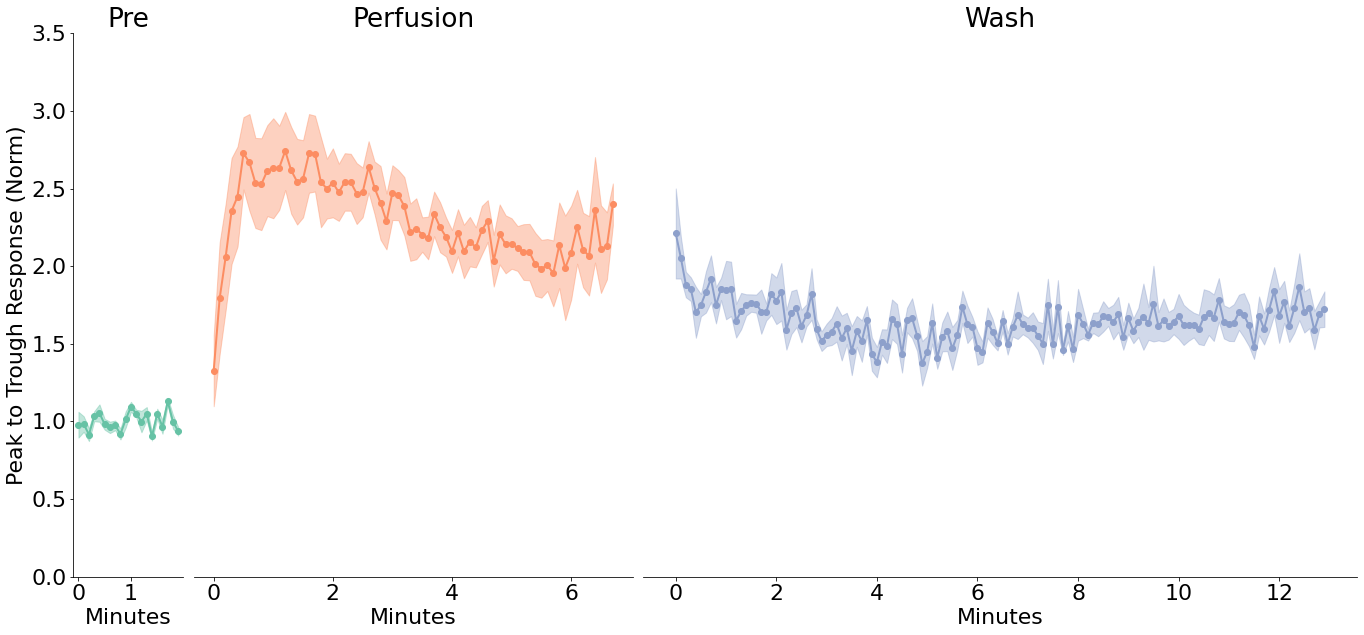

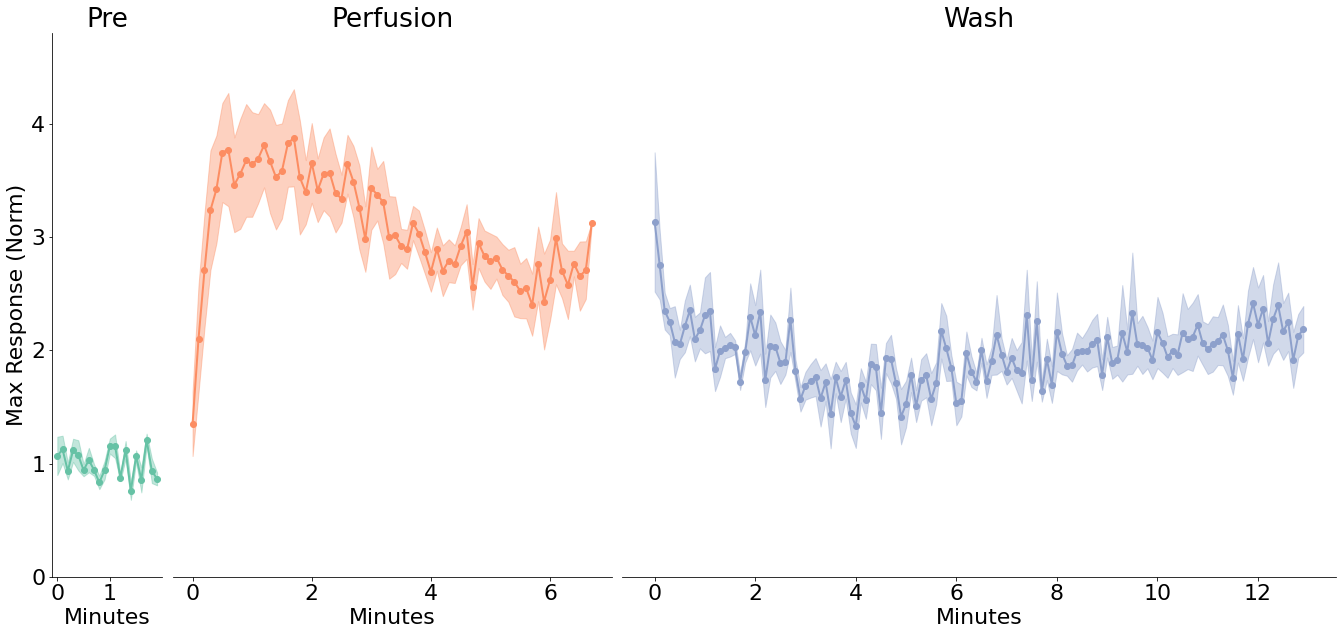

In [245]:
# Plot for the PtT and Max
save_fig = True

# set the color map
cmap = plt.get_cmap('Set2') # also 'cool' 'winter' 'PRGn' 'Pastel1' 'YlGnBu' 'twilight'
colors = [cmap(i) for i in np.linspace(0, 1.0, 8)]

# Peak-to-Trough Figure
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth((pre_count + perf_count + post_count)/10)
gs = plt.GridSpec(1, 3, width_ratios=[pre_count, perf_count, post_count])
gs.update(wspace=0.025, hspace=0.05) # set the spacing between axes.
ptt_ax = []
ptt_ax.append(fig.add_subplot(gs[0]))
ptt_ax.append(fig.add_subplot(gs[1]))
ptt_ax.append(fig.add_subplot(gs[2]))
[x.set_ylim([0, 3.5]) for x in ptt_ax]

# Max Figure
fig_max = plt.figure()
fig_max.set_figheight(10)
fig_max.set_figwidth((pre_count + perf_count + post_count)/10)
gs_max = plt.GridSpec(1, 3, width_ratios=[pre_count, perf_count, post_count])
gs_max.update(wspace=0.025, hspace=0.05) # set the spacing between axes.
max_ax = []
max_ax.append(fig_max.add_subplot(gs_max[0]))
max_ax.append(fig_max.add_subplot(gs_max[1]))
max_ax.append(fig_max.add_subplot(gs_max[2]))
[x.set_ylim([0, 4.8]) for x in max_ax]

# loop through all the block types
for block_ind in range(len(exp_block_type)):
    if block_ind == 0:
        ptt_ax[block_ind].plot(pre_time_total, pre_ptt_mean, color=colors[block_ind], linewidth=2, marker='o',)
        ptt_ax[block_ind].fill_between(pre_time_total, pre_ptt_mean - pre_ptt_sem, pre_ptt_mean + pre_ptt_sem, color=colors[block_ind], alpha=0.4)
        ptt_ax[block_ind].set_title('Pre')
        ptt_ax[block_ind].set_ylabel('Peak to Trough Response (Norm)')
        # remove the right and top axes
        ptt_ax[block_ind].spines['right'].set_visible(False)
        ptt_ax[block_ind].spines['top'].set_visible(False)

        max_ax[block_ind].plot(pre_time_total, pre_max_mean, color=colors[block_ind], linewidth=2, marker='o',)
        max_ax[block_ind].fill_between(pre_time_total, pre_max_mean - pre_max_sem, pre_max_mean + pre_max_sem, color=colors[block_ind], alpha=0.4)
        max_ax[block_ind].set_title('Pre')
        max_ax[block_ind].set_ylabel('Max Response (Norm)')
        # remove the right and top axes
        max_ax[block_ind].spines['right'].set_visible(False)
        max_ax[block_ind].spines['top'].set_visible(False)

    elif block_ind == 1:
        ptt_ax[block_ind].plot(perf_time_total[:-12], perf_ptt_mean[:-12], color=colors[block_ind], linewidth=2, marker='o',)
        ptt_ax[block_ind].fill_between(perf_time_total[:-12], perf_ptt_mean[:-12] - perf_ptt_sem[:-12], perf_ptt_mean[:-12] + perf_ptt_sem[:-12], color=colors[block_ind], alpha=0.4)
        ptt_ax[block_ind].set_title('Perfusion')
        ptt_ax[block_ind].spines['left'].set_visible(False)
        ptt_ax[block_ind].spines['top'].set_visible(False)
        ptt_ax[block_ind].spines['right'].set_visible(False)
        ptt_ax[block_ind].set_yticklabels([])
        ptt_ax[block_ind].set_yticks([])

        max_ax[block_ind].plot(perf_time_total[:-12], perf_max_mean[:-12], color=colors[block_ind], linewidth=2, marker='o',)
        max_ax[block_ind].fill_between(perf_time_total[:-12], perf_max_mean[:-12] - perf_max_sem[:-12], perf_max_mean[:-12] + perf_max_sem[:-12], color=colors[block_ind], alpha=0.4)
        max_ax[block_ind].set_title('Perfusion')
        max_ax[block_ind].spines['left'].set_visible(False)
        max_ax[block_ind].spines['top'].set_visible(False)
        max_ax[block_ind].spines['right'].set_visible(False)
        max_ax[block_ind].set_yticklabels([])
        max_ax[block_ind].set_yticks([])

    elif block_ind == 2:
        ptt_ax[block_ind].plot(post_time_total, post_ptt_mean, color=colors[block_ind], linewidth=2, marker='o',)
        ptt_ax[block_ind].fill_between(post_time_total, post_ptt_mean - post_ptt_sem, post_ptt_mean + post_ptt_sem, color=colors[block_ind], alpha=0.4)
        ptt_ax[block_ind].set_title('Wash')
        # remove the left, right, and top axes
        ptt_ax[block_ind].spines['left'].set_visible(False)
        ptt_ax[block_ind].spines['right'].set_visible(False)
        ptt_ax[block_ind].spines['top'].set_visible(False)
        ptt_ax[block_ind].set_yticklabels([])
        ptt_ax[block_ind].set_yticks([])

        max_ax[block_ind].plot(post_time_total, post_max_mean, color=colors[block_ind], linewidth=2, marker='o',)
        max_ax[block_ind].fill_between(post_time_total, post_max_mean - post_max_sem, post_max_mean + post_max_sem, color=colors[block_ind], alpha=0.4)
        max_ax[block_ind].set_title('Wash')
        # remove the left, right, and top axes
        max_ax[block_ind].spines['left'].set_visible(False)
        max_ax[block_ind].spines['right'].set_visible(False)
        max_ax[block_ind].spines['top'].set_visible(False)
        max_ax[block_ind].set_yticklabels([])
        max_ax[block_ind].set_yticks([])

    ptt_ax[block_ind].set_xlabel('Minutes')
    max_ax[block_ind].set_xlabel('Minutes')

if save_fig == True:
    fig.savefig(save_directory + '/perfusion_ptt_across_flies_colorful.png', bbox_inches='tight', dpi=300)
    fig.savefig(save_directory + '/perfusion_ptt_across_flies_colorful.svg', bbox_inches='tight', dpi=300)
    fig_max.savefig(save_directory + '/perfusion_max_across_flies_colorful.png', bbox_inches='tight', dpi=300)
    fig_max.savefig(save_directory + '/perfusion_max_across_flies_colorful.svg', bbox_inches='tight', dpi=300)

## Summary Figures

First, average trials to get a vector for each metric that is n_fly long

In [200]:
pre_ptt_fly_trial_norm.shape

(6, 20)

In [203]:
perf_split = False
post_split = False

# these are the normalized metrics for each fly by trial
# pre_ptt_fly_trial_norm, perf_ptt_fly_trial_norm, post_ptt_fly_trial_norm
# pre_max_fly_trial_norm, perf_max_fly_trial_norm, post_max_fly_trial_norm
#pre_min_fly_trial_norm, perf_min_fly_trial_norm, post_min_fly_trial_norm = normalize_by_pre_block(pre_min_fly_trial, perf_min_fly_trial, post_min_fly_trial)

# print the number of trials for each block type
print('Pre Block Trials: ', len(pre_max_fly_trial_norm[0]))
print('Perf Block Trials len: ', len(perf_max_fly_trial_norm))
print('Post Block Trials: ', len(post_max_fly_trial_norm[0]), '\n')

# Take the mean value across trials for each block, each fly
# straight mean for the pre block
cross_fly_pre_max = np.nanmean(pre_max_fly_trial_norm, axis=1)
cross_fly_pre_ptt = np.nanmean(pre_ptt_fly_trial_norm, axis=1)

# and mean for the perf block
cross_fly_perf_max = np.nanmean(perf_max_fly_trial_norm, axis=1)
cross_fly_perf_ptt = np.nanmean(perf_ptt_fly_trial_norm, axis=1)

# just take the mean of the whole post block
cross_fly_post_max = np.nanmean(post_max_fly_trial_norm, axis=1)
cross_fly_post_ptt = np.nanmean(post_ptt_fly_trial_norm, axis=1)

# calculate the mean and standard error for each block type
pre_max_mean = np.mean(cross_fly_pre_max)
pre_max_sem = np.std(cross_fly_pre_max)/np.sqrt(len(cross_fly_pre_max))
pre_ptt_mean = np.mean(cross_fly_pre_ptt)
pre_ptt_sem = np.std(cross_fly_pre_ptt)/np.sqrt(len(cross_fly_pre_ptt))

perf_max_mean = np.mean(cross_fly_perf_max)
perf_max_sem = np.std(cross_fly_perf_max)/np.sqrt(len(cross_fly_perf_max))
perf_ptt_mean = np.mean(cross_fly_perf_ptt)
perf_ptt_sem = np.std(cross_fly_perf_ptt)/np.sqrt(len(cross_fly_perf_ptt))

post_max_mean = np.mean(cross_fly_post_max)
post_max_sem = np.std(cross_fly_post_max)/np.sqrt(len(cross_fly_post_max))
post_ptt_mean = np.mean(cross_fly_post_ptt)
post_ptt_sem = np.std(cross_fly_post_ptt)/np.sqrt(len(cross_fly_post_ptt))

# add each fly max and ptt to a pandas dataframe
cross_fly_max_df = pd.DataFrame({'Pre': cross_fly_pre_max,
                                'Perf': cross_fly_perf_max,
                                'Post': cross_fly_post_max})
cross_fly_ptt_df = pd.DataFrame({'Pre': cross_fly_pre_ptt,
                                'Perf': cross_fly_perf_ptt,
                                'Post': cross_fly_post_ptt})



Pre Block Trials:  20
Perf Block Trials len:  6
Post Block Trials:  130 



In [208]:
pre_max_fly_trial_norm.shape

(6, 20)

## Create the summary figures

The first figure will be the mean across flies, with the sem
The second will be the peak-to-trough across flies, with the sem. 

Don't split the wash because it doesn't really go down differently across halves when averaged.

This is normalized to the average of the Pre period and skips the trials in the Perfusion period before the effect

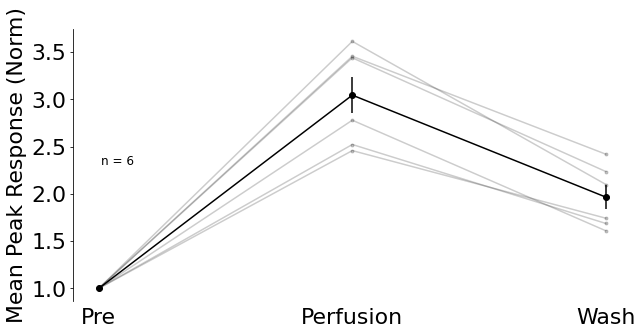

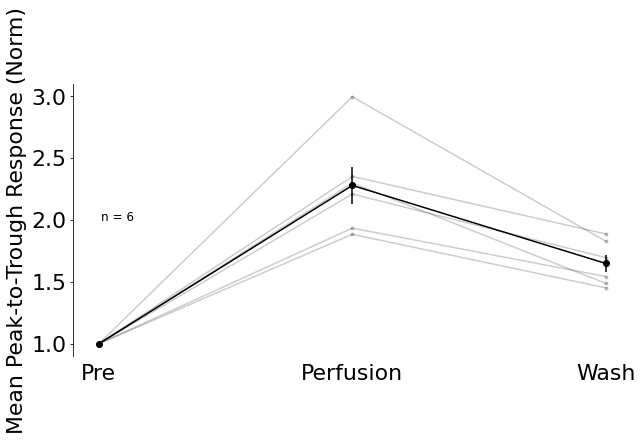

In [212]:
# Plot the mean and peak-to-trough response for each block type
save_fig = True

block = ['Pre', 'Perfusion', 'Wash']

max_fig, max_ax = plt.subplots(figsize=(10, 5))
ptt_fig, ptt_ax = plt.subplots(figsize=(10, 5))

# plot the mean response
max_ax.plot(block, [pre_max_mean, perf_max_mean, post_max_mean], color='k', marker='o')
max_ax.errorbar(block, [pre_max_mean, perf_max_mean, post_max_mean], yerr=[pre_max_sem, perf_max_sem, post_max_sem], color='k', linestyle='None')

# # add significance stars
# # pre-per 1
# max_ax.plot([0, 1], [1.3*max(pre_max_mean, perf_max_2_mean), 1.3*max(pre_max_mean, perf_max_2_mean)], color='k', marker='|', linewidth=0.5)
# max_ax.annotate('*', xy=(0.5, 1.3*max(pre_max_mean, perf_max_2_mean)), xycoords='data', fontsize=8)
# # pre-per 2
# max_ax.plot([0, 2], [1.35*max(pre_max_mean, perf_max_2_mean), 1.35*max(pre_max_mean, perf_max_2_mean)], color='k', marker='|', linewidth=0.5)
# max_ax.annotate('**', xy=(1.5, 1.35*max(pre_max_mean, perf_max_2_mean)), xycoords='data', fontsize=8)
# # pre-post
# max_ax.plot([0, 3], [1.4*max(pre_max_mean, perf_max_2_mean), 1.4*max(pre_max_mean, perf_max_2_mean)], color='k', marker='|', linewidth=0.5)
# max_ax.annotate('**', xy=(2.5, 1.4*max(pre_max_mean, perf_max_1_mean, perf_max_2_mean)), xycoords='data', fontsize=8)
# # per 2-post
# max_ax.plot([2, 3], [1.3*max(pre_max_mean, perf_max_2_mean), 1.3*max(pre_max_mean, perf_max_2_mean)], color='k', marker='|', linewidth=0.5)
# max_ax.annotate('*', xy=(2.5, 1.3*max(pre_max_mean, perf_max_1_mean, perf_max_2_mean)), xycoords='data', fontsize=8)

# annotate the plot with the number of flies used
max_ax.annotate('n = ' + str(len(cross_fly_pre_max)), xy=(0.05, 0.5), xycoords='axes fraction', fontsize=12)
# plot each fly's response
for i in range(len(cross_fly_pre_max)):
    max_ax.plot(block, [cross_fly_pre_max[i], cross_fly_perf_max[i], cross_fly_post_max[i]], color='k', marker='.', alpha=0.2)
#max_ax.set_title('Mean Peak Response')
max_ax.set_ylabel('Mean Peak Response (Norm)')

# plot the peak-to-trough response
ptt_ax.plot(block, [pre_ptt_mean, perf_ptt_mean, post_ptt_mean], color='k', marker='o')
ptt_ax.errorbar(block, [pre_ptt_mean, perf_ptt_mean, post_ptt_mean],
                yerr=[pre_ptt_sem, perf_ptt_sem, post_ptt_sem], color='k', linestyle='None')
# add significance stars
# # pre-per 1
# ptt_ax.plot([0, 1], [1.3*max(pre_ptt_mean, perf_ptt_2_mean), 1.3*max(pre_ptt_mean, perf_ptt_2_mean)], color='k', marker='|', linewidth=0.5)
# ptt_ax.annotate('*', xy=(0.5, 1.3*max(pre_ptt_mean, perf_ptt_2_mean)), xycoords='data', fontsize=8)
# # pre-per 2
# ptt_ax.plot([0, 2], [1.35*max(pre_ptt_mean, perf_ptt_2_mean), 1.35*max(pre_ptt_mean, perf_ptt_2_mean)], color='k', marker='|', linewidth=0.5)
# ptt_ax.annotate('***', xy=(1.5, 1.35*max(pre_ptt_mean, perf_ptt_2_mean)), xycoords='data', fontsize=8)
# # pre-post
# ptt_ax.plot([0, 3], [1.4*max(pre_ptt_mean, perf_ptt_2_mean), 1.4*max(pre_ptt_mean, perf_ptt_2_mean)], color='k', marker='|', linewidth=0.5)
# ptt_ax.annotate('***', xy=(2.5, 1.4*max(pre_ptt_mean, perf_ptt_1_mean, perf_ptt_2_mean)), xycoords='data', fontsize=8)
# # per 2-post
# ptt_ax.plot([2, 3], [1.3*max(pre_ptt_mean, perf_ptt_2_mean), 1.3*max(pre_ptt_mean, perf_ptt_2_mean)], color='k', marker='|', linewidth=0.5)
# ptt_ax.annotate('*', xy=(2.5, 1.3*max(pre_ptt_mean, perf_ptt_1_mean, perf_ptt_2_mean)), xycoords='data', fontsize=8)
# # annotate the plot with the number of flies used
# ptt_ax.annotate('n = ' + str(len(cross_fly_pre_ptt)), xy=(0.05, 0.5), xycoords='axes fraction', fontsize=12)

# annotate the plot with the number of flies used
ptt_ax.annotate('n = ' + str(len(cross_fly_pre_ptt)), xy=(0.05, 0.5), xycoords='axes fraction', fontsize=12)
# plot each fly's response
for i in range(len(cross_fly_pre_ptt)):
    ptt_ax.plot(block, [cross_fly_pre_ptt[i], cross_fly_perf_ptt[i], cross_fly_post_ptt[i]], color='k', marker='.', alpha=0.2)
#ptt_ax.set_title('Mean Peak-to-Trough Response')
ptt_ax.set_ylabel('Mean Peak-to-Trough Response (Norm)')

# remove the top and right and bottom spines from the plot
max_ax.spines['top'].set_visible(False)
max_ax.spines['right'].set_visible(False)
max_ax.spines['bottom'].set_visible(False)

ptt_ax.spines['top'].set_visible(False)
ptt_ax.spines['right'].set_visible(False)
ptt_ax.spines['bottom'].set_visible(False)
# remove the x ticks from the plot
max_ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ptt_ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

# save the figure
if save_fig:
    max_fig.savefig(f'{save_directory}/C.cross_max_response_3blocks_norm_skip.png', dpi=300, bbox_inches='tight')
    max_fig.savefig(f'{save_directory}/C.cross_max_response_3blocks_norm_skip.svg', dpi=300, bbox_inches='tight')
    ptt_fig.savefig(f'{save_directory}/C.cross_ptt_response_3blocks_norm_skip.png', dpi=300, bbox_inches='tight')
    ptt_fig.savefig(f'{save_directory}/C.cross_ptt_response_3blocks_norm_skip.svg', dpi=300, bbox_inches='tight')


Below is if I'm splitting the perfusion block

## Statistics!

Time to run some stats on the various blocks comparing them to each other

The first thing is to

### Assumption test

We want to see if we can run parametric tests. for that to work, the data need to be homogenous in variance and normal in distribution

In [214]:
cross_fly_pre_max

array([1., 1., 1., 1., 1., 1.])

In [215]:
# Run stats on the mean response of each block type compared to every other block type
# For MAX
# Testing for homogeneity. P-value > 0.05 means we can assume homogeneity of variance
print('-------------------------------------------')
print('MAX HOMOGENEITY TESTING')

# test for homogeneity of variance between pre and perfusion
print('Pre vs. Perfusion')
print(st.levene(cross_fly_pre_max, cross_fly_perf_max))
# test for homogeneity of variance between pre and wash
print('Pre vs. Wash')
print(st.levene(cross_fly_pre_max, cross_fly_post_max))
# test for homogeneity of variance between perfusion and wash
print('Perfusion vs. Wash')
print(st.levene(cross_fly_perf_max, cross_fly_post_max))
print('-------------------------------------------')

# Testing for normality. P-value > 0.05 means we can assume normality
print('-------------------------------------------')
print('MAX NORMALITY TESTING')
# test for normality for pre
print('Pre')
print(st.shapiro(cross_fly_pre_max))
# test for normality for perfusion
print('Perfusion')
print(st.shapiro(cross_fly_perf_max)) 
# test for normality for wash
print('Wash')
print(st.shapiro(cross_fly_post_max))
print('-------------------------------------------')

# For PTT
# Testing for homogeneity. P-value > 0.05 means we can assume homogeneity of variance
print('-------------------------------------------')
print('PTT HOMOGENEITY TESTING')

# test for homogeneity of variance between pre and perfusion
print('Pre vs. Perfusion')
print(st.levene(cross_fly_pre_ptt, cross_fly_perf_ptt))
# test for homogeneity of variance between pre and wash
print('Pre vs. Wash')
print(st.levene(cross_fly_pre_ptt, cross_fly_post_ptt))
# test for homogeneity of variance between perfusion and wash
print('Perfusion vs. Wash')
print(st.levene(cross_fly_perf_ptt, cross_fly_post_ptt))
print('-------------------------------------------')

# Testing for normality. P-value > 0.05 means we can assume normality
print('-------------------------------------------')
print('PTT NORMALITY TESTING')
# test for normality for pre
print('Pre')
print(st.shapiro(cross_fly_pre_ptt))
# test for normality for perfusion
print('Perfusion')
print(st.shapiro(cross_fly_perf_ptt))
# test for normality for wash
print('Wash')
print(st.shapiro(cross_fly_post_ptt))
print('-------------------------------------------')


-------------------------------------------
MAX HOMOGENEITY TESTING
Pre vs. Perfusion
LeveneResult(statistic=62.099651024555214, pvalue=1.3433325175116485e-05)
Pre vs. Wash
LeveneResult(statistic=33.80393000153894, pvalue=0.00016967010644032302)
Perfusion vs. Wash
LeveneResult(statistic=5.112454212266726, pvalue=0.04728219733569163)
-------------------------------------------
-------------------------------------------
MAX NORMALITY TESTING
Pre
ShapiroResult(statistic=1.0, pvalue=1.0)
Perfusion
ShapiroResult(statistic=0.846338152885437, pvalue=0.14698593318462372)
Wash
ShapiroResult(statistic=0.9054862260818481, pvalue=0.40737301111221313)
-------------------------------------------
-------------------------------------------
PTT HOMOGENEITY TESTING
Pre vs. Perfusion
LeveneResult(statistic=5.949238689641385, pvalue=0.03490230375935843)
Pre vs. Wash
LeveneResult(statistic=24.99886783759714, pvalue=0.000537423279250289)
Perfusion vs. Wash
LeveneResult(statistic=1.0012109175970831, pvalue

/Users/averykrieger/envs/stim_analysis/lib/python3.9/site-packages/scipy/stats/_morestats.py:1758: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Normal and not homogeneous!

Since the data are not homogenous and normal, we cannot run parametric tests :(

In [216]:
cross_fly_max_df

,Pre,Perf,Post
0,1.0,2.458185,1.742630
1,1.0,2.522699,1.687090
2,1.0,3.439698,2.235912
3,1.0,3.456286,2.419664
4,1.0,3.613817,2.099403
5,1.0,2.779740,1.609302


In [71]:
# Run stats on the means for max and ptt
# ANOVA first
print('-------------------------------------------')
print('ANOVA TESTING')
# ANOVA for max
print('Max Response')
max_stat, max_p = st.f_oneway(cross_fly_pre_max, cross_fly_perf_max, cross_fly_post_max)
print('F-value: ' + str(max_stat)) 
print('p-value: ' + str(max_p))
# ANOVA for ptt
print('Peak-to-Trough Response')
ptt_stat, ptt_p = st.f_oneway(cross_fly_pre_ptt, cross_fly_perf_ptt, cross_fly_post_ptt)
print('F-value: ' + str(ptt_stat))
print('p-value: ' + str(ptt_p))
print('-------------------------------------------')


-------------------------------------------
ANOVA TESTING
Max Response
F-value: 19.587175041046496
p-value: 6.564952962892666e-05
Peak-to-Trough Response
F-value: 26.154937873827077
p-value: 1.2885270095061418e-05
-------------------------------------------


There's significance in the ANOVA! _ anova is only for parametric valid data _

## Wilcoxon signed-rank test b/c non-parametric

In [221]:
is_par = False
alt_hypo = 'less' # 'two-sided', 'greater', 'less'

print('WILCOXON SIGNED RANK TESTING')
# wilxocon signed rank test for max
print('-------------------------------------------')
print('Max Response')
# pre vs perfusion
print('Pre < Perfusion')
max_preXperf_stat, max_preXperf_p = st.wilcoxon(cross_fly_pre_max, cross_fly_perf_max, correction=True, alternative='less')
print('Statistic: ' + str(max_preXperf_stat))
print('p-value: ' + str(max_preXperf_p))
# perf vs wash
print('Perfusion > Wash')
max_perfXpost_stat, max_perfXpost_p = st.wilcoxon(cross_fly_perf_max, cross_fly_post_max, correction=True, alternative='greater')
print('Statistic: ' + str(max_perfXpost_stat))
print('p-value: ' + str(max_perfXpost_p))
# pre vs wash
print('Pre < Wash')
max_preXpost_stat, max_preXpost_p = st.wilcoxon(cross_fly_pre_max, cross_fly_post_max, correction=True, alternative='less')
print('Statistic: ' + str(max_preXpost_stat))
print('p-value: ' + str(max_preXpost_p))
print('-------------------------------------------\n')

# wilxocon signed rank test for ptt
print('-------------------------------------------')
print('Peak-to-Trough Response')
# pre vs perfusion
print('Pre < Perfusion')
ptt_preXperf_stat, ptt_preXperf_p = st.wilcoxon(cross_fly_pre_ptt, cross_fly_perf_ptt, correction=True, alternative='less')
print('Statistic: ' + str(ptt_preXperf_stat))
print('p-value: ' + str(ptt_preXperf_p))
# perf vs wash
print('Perfusion > Wash')
ptt_perfXpost_stat, ptt_perfXpost_p = st.wilcoxon(cross_fly_perf_ptt, cross_fly_post_ptt, correction=True, alternative='greater')
print('Statistic: ' + str(ptt_perfXpost_stat))
print('p-value: ' + str(ptt_perfXpost_p))
# pre vs wash
print('Pre < Wash')
ptt_preXpost_stat, ptt_preXpost_p = st.wilcoxon(cross_fly_pre_ptt, cross_fly_post_ptt, correction=True, alternative='less')
print('Statistic: ' + str(ptt_preXpost_stat))
print('p-value: ' + str(ptt_preXpost_p))
print('-------------------------------------------')


WILCOXON SIGNED RANK TESTING
-------------------------------------------
Max Response
Pre < Perfusion
Statistic: 0.0
p-value: 0.015625
Perfusion > Wash
Statistic: 21.0
p-value: 0.015625
Pre < Wash
Statistic: 0.0
p-value: 0.015625
-------------------------------------------

-------------------------------------------
Peak-to-Trough Response
Pre < Perfusion
Statistic: 0.0
p-value: 0.015625
Perfusion > Wash
Statistic: 21.0
p-value: 0.015625
Pre < Wash
Statistic: 0.0
p-value: 0.015625
-------------------------------------------


In [224]:
print(f'cross_fly_perf_max: {cross_fly_perf_max}')
print(f'cross_fly_perf_ptt: {cross_fly_perf_ptt}')

cross_fly_perf_max: [2.45818471 2.52269854 3.43969796 3.45628636 3.61381731 2.77974022]
cross_fly_perf_ptt: [1.93465886 1.88461143 2.20981544 2.35186722 2.99516974 2.29824871]


In [217]:
# Now run pairwise comparisons
print('-------------------------------------------')
print('PAIRWISE COMPARISONS')
# Max response
print('Max Response')
# pre vs. perfusion
print('Pre < Perfusion')
max_pre_perf_stat, max_pre_perf_p = st.ttest_ind(cross_fly_pre_max, cross_fly_perf_max)
print('t-value: ' + str(max_pre_perf_stat))
print('p-value: ' + str(max_pre_perf_p))
# pre vs. wash
print('Pre vs. Wash')
max_pre_post_stat, max_pre_post_p = st.ttest_ind(cross_fly_pre_max, cross_fly_post_max)
print('t-value: ' + str(max_pre_post_stat))
print('p-value: ' + str(max_pre_post_p))
# perfusion vs. wash
print('Perfusion vs. Wash')
max_perf_post_stat, max_perf_post_p = st.ttest_ind(cross_fly_perf_max, cross_fly_post_max)
print('t-value: ' + str(max_perf_post_stat))
print('p-value: ' + str(max_perf_post_p))
print('-------------------------------------------')

# Peak-to-trough response
print('Peak-to-Trough Response')
# pre vs. perfusion
print('Pre vs. Perfusion')
ptt_pre_perf_stat, ptt_pre_perf_p = st.ttest_ind(cross_fly_pre_ptt, cross_fly_perf_ptt)
print('t-value: ' + str(ptt_pre_perf_stat))
print('p-value: ' + str(ptt_pre_perf_p))
# pre vs. wash
print('Pre vs. Wash')
ptt_pre_post_stat, ptt_pre_post_p = st.ttest_ind(cross_fly_pre_ptt, cross_fly_post_ptt)
print('t-value: ' + str(ptt_pre_post_stat))
print('p-value: ' + str(ptt_pre_post_p))
# perfusion vs. wash
print('Perfusion vs. Wash')
ptt_perf_post_stat, ptt_perf_post_p = st.ttest_ind(cross_fly_perf_ptt, cross_fly_post_ptt)
print('t-value: ' + str(ptt_perf_post_stat))
print('p-value: ' + str(ptt_perf_post_p))
print('-------------------------------------------')



-------------------------------------------
PAIRWISE COMPARISONS
Max Response
Pre vs. Perfusion
t-value: -9.690901160231816
p-value: 2.1180017584634233e-06
Pre vs. Wash
t-value: -7.123008137002121
p-value: 3.2061631156172394e-05
Perfusion vs. Wash
t-value: 4.303423739044279
p-value: 0.0015530540098203872
-------------------------------------------
Peak-to-Trough Response
Pre vs. Perfusion
t-value: -7.844993582043207
p-value: 1.3970355340633593e-05
Pre vs. Wash
t-value: -8.697854175074683
p-value: 5.619215011808922e-06
Perfusion vs. Wash
t-value: 3.5153199361506804
p-value: 0.005581861656895466
-------------------------------------------
